# Milestone 2 - Bank Marketing

## Introduction

Name : Vania Alya Qonita <br>
Batch : RMT 029 <br>
<br>

**Background**

A marketing division of a portuguese banking institution sees a decrease in the term deposit subscription. Thus, they want to increase this subscription user count.
<br>
<br>
**Questions**
1. What is the features that can help predict the user subscription?
2. Who is the users who subscribe to term deposit?
3. When do users usually subscribe to the term deposit?
4. What is the best model to predict the user subscription?
5. How does the feature correlate with each other?

Goal : Create a classification model which consists of KNN, SVM, Decision Tree, Random Forest and Boosting to predict Customer Subscription to Term Deposit.

## Import Libraries

In [1]:
# Install feature-engine library

!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


In [2]:
# Downgrading scikit learn to 1.2.2 for SMOTE purposes
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Successfully uninstalled scikit-learn-1.4.1.post1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 29.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
feature-engine 1.7.0 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.


In [3]:
# Import libraries that is going to be used
import pandas as pd
import numpy as np
# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library for correlaiton
from scipy import stats
# Library for model saving
import pickle
# Library for handling outlier
from feature_engine.outliers import Winsorizer

# Scikit learn libraries
# for splitting data
from sklearn.model_selection import train_test_split
# for feature selection
from sklearn.feature_selection import f_classif, SelectKBest
# for scaling data
from sklearn.preprocessing import StandardScaler
# for encoding
from sklearn.preprocessing import OneHotEncoder
# for classification modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# for boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# for evaluasi
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
# for Cross Validation
from sklearn.model_selection import cross_val_score
# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# for pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# for data balancing
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

## Data Loading
This section contains the data preparation process before further data exploration is carried out. Data loading can be done via loading data csv with read_csv. The data used is Bank Marketing from UC Irvine that can be accessed [in this link](https://archive.ics.uci.edu/dataset/222/bank+marketing).

In [4]:
# Loading data into df
df = pd.read_csv('P1M2_vania_alya.csv', sep = ';')
# Displays result data
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


The Bank Marketing Dataset contains data related to marketing campaigns of a Portuguese banking institution. The dataset includes various features such as client demographics, economic indicators, previous marketing campaign outcomes. The detailed desciption is as follows.

1. age: (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: (categorical: primary, secondary, tertiary and unknown)
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. balance: Balance of the individual.
9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



In [5]:
# Displays the initial 10 table data with head
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [6]:
# Displays the final 10 data using tail
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


## Data Cleaning
Initial data clean up for duplication and missing value checking.

In [7]:
# Check for duplication of data
df.duplicated().value_counts()

False    4521
Name: count, dtype: int64

Data is clean from duplicated data.

In [8]:
# Checks for null data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

From the initial missing value handling, we can see that there is actually no missing values. However, from the data description there is an added info of `unknown` value that can be described as missing values.

In [9]:
# Check the unknown value for all columns
print("The number of unknown value :")
for var in df.columns:
    print(f"{var} : {df[df[var]=='unknown'][var].count()}")

The number of unknown value :
age : 0
job : 38
marital : 0
education : 187
default : 0
balance : 0
housing : 0
loan : 0
contact : 1324
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 3705
y : 0


From the result we can see multiple columns that has unknown data. However, as we can see these columns are categorical data which can be tricky for imputation processes. Thus, we can check if the columns with unknown data will be used as a feature or not. If it will be used as a feature, we will check the % of unknown data and define the next steps.

In [10]:
# View the percentage of unknown values ​​from the entire data
for var in df.columns :
    print(f"Percentage of unknwon data from {var} : {(df[df[var]=='unknown'][var].count())/(len(df[var]))*100} %")

Percentage of unknwon data from age : 0.0 %
Percentage of unknwon data from job : 0.8405220084052201 %
Percentage of unknwon data from marital : 0.0 %
Percentage of unknwon data from education : 4.13625304136253 %
Percentage of unknwon data from default : 0.0 %
Percentage of unknwon data from balance : 0.0 %
Percentage of unknwon data from housing : 0.0 %
Percentage of unknwon data from loan : 0.0 %
Percentage of unknwon data from contact : 29.285556292855563 %
Percentage of unknwon data from day : 0.0 %
Percentage of unknwon data from month : 0.0 %
Percentage of unknwon data from duration : 0.0 %
Percentage of unknwon data from campaign : 0.0 %
Percentage of unknwon data from pdays : 0.0 %
Percentage of unknwon data from previous : 0.0 %
Percentage of unknwon data from poutcome : 81.95089581950896 %
Percentage of unknwon data from y : 0.0 %


From the data we can see a high unknown data in poutcome (81%) and contact (29%). We need to be considerate of these numbers when choosing the features.

## Exploratory Data Analysis
This section contains data exploration in the dataset above using queries, grouping, simple visualization, and so on.

### Data Understanding

In [11]:
# View available columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
# View available data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


From above it can be seen that the dataset includes 7 integer data and 10 object data. The data type matches the value.

In [13]:
# View the amount of data available
df.shape

(4521, 17)

Data consists of 17 columns with 4521 row data.

In [14]:
# Check central tendency using describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Looking at the comparison of the mean with the median, the data appears to have a skew data in balance and duration. There is also a unique value in pdays which is -1 which means the client was not contacted.

### Data Visualization

#### 1. Data Distribution

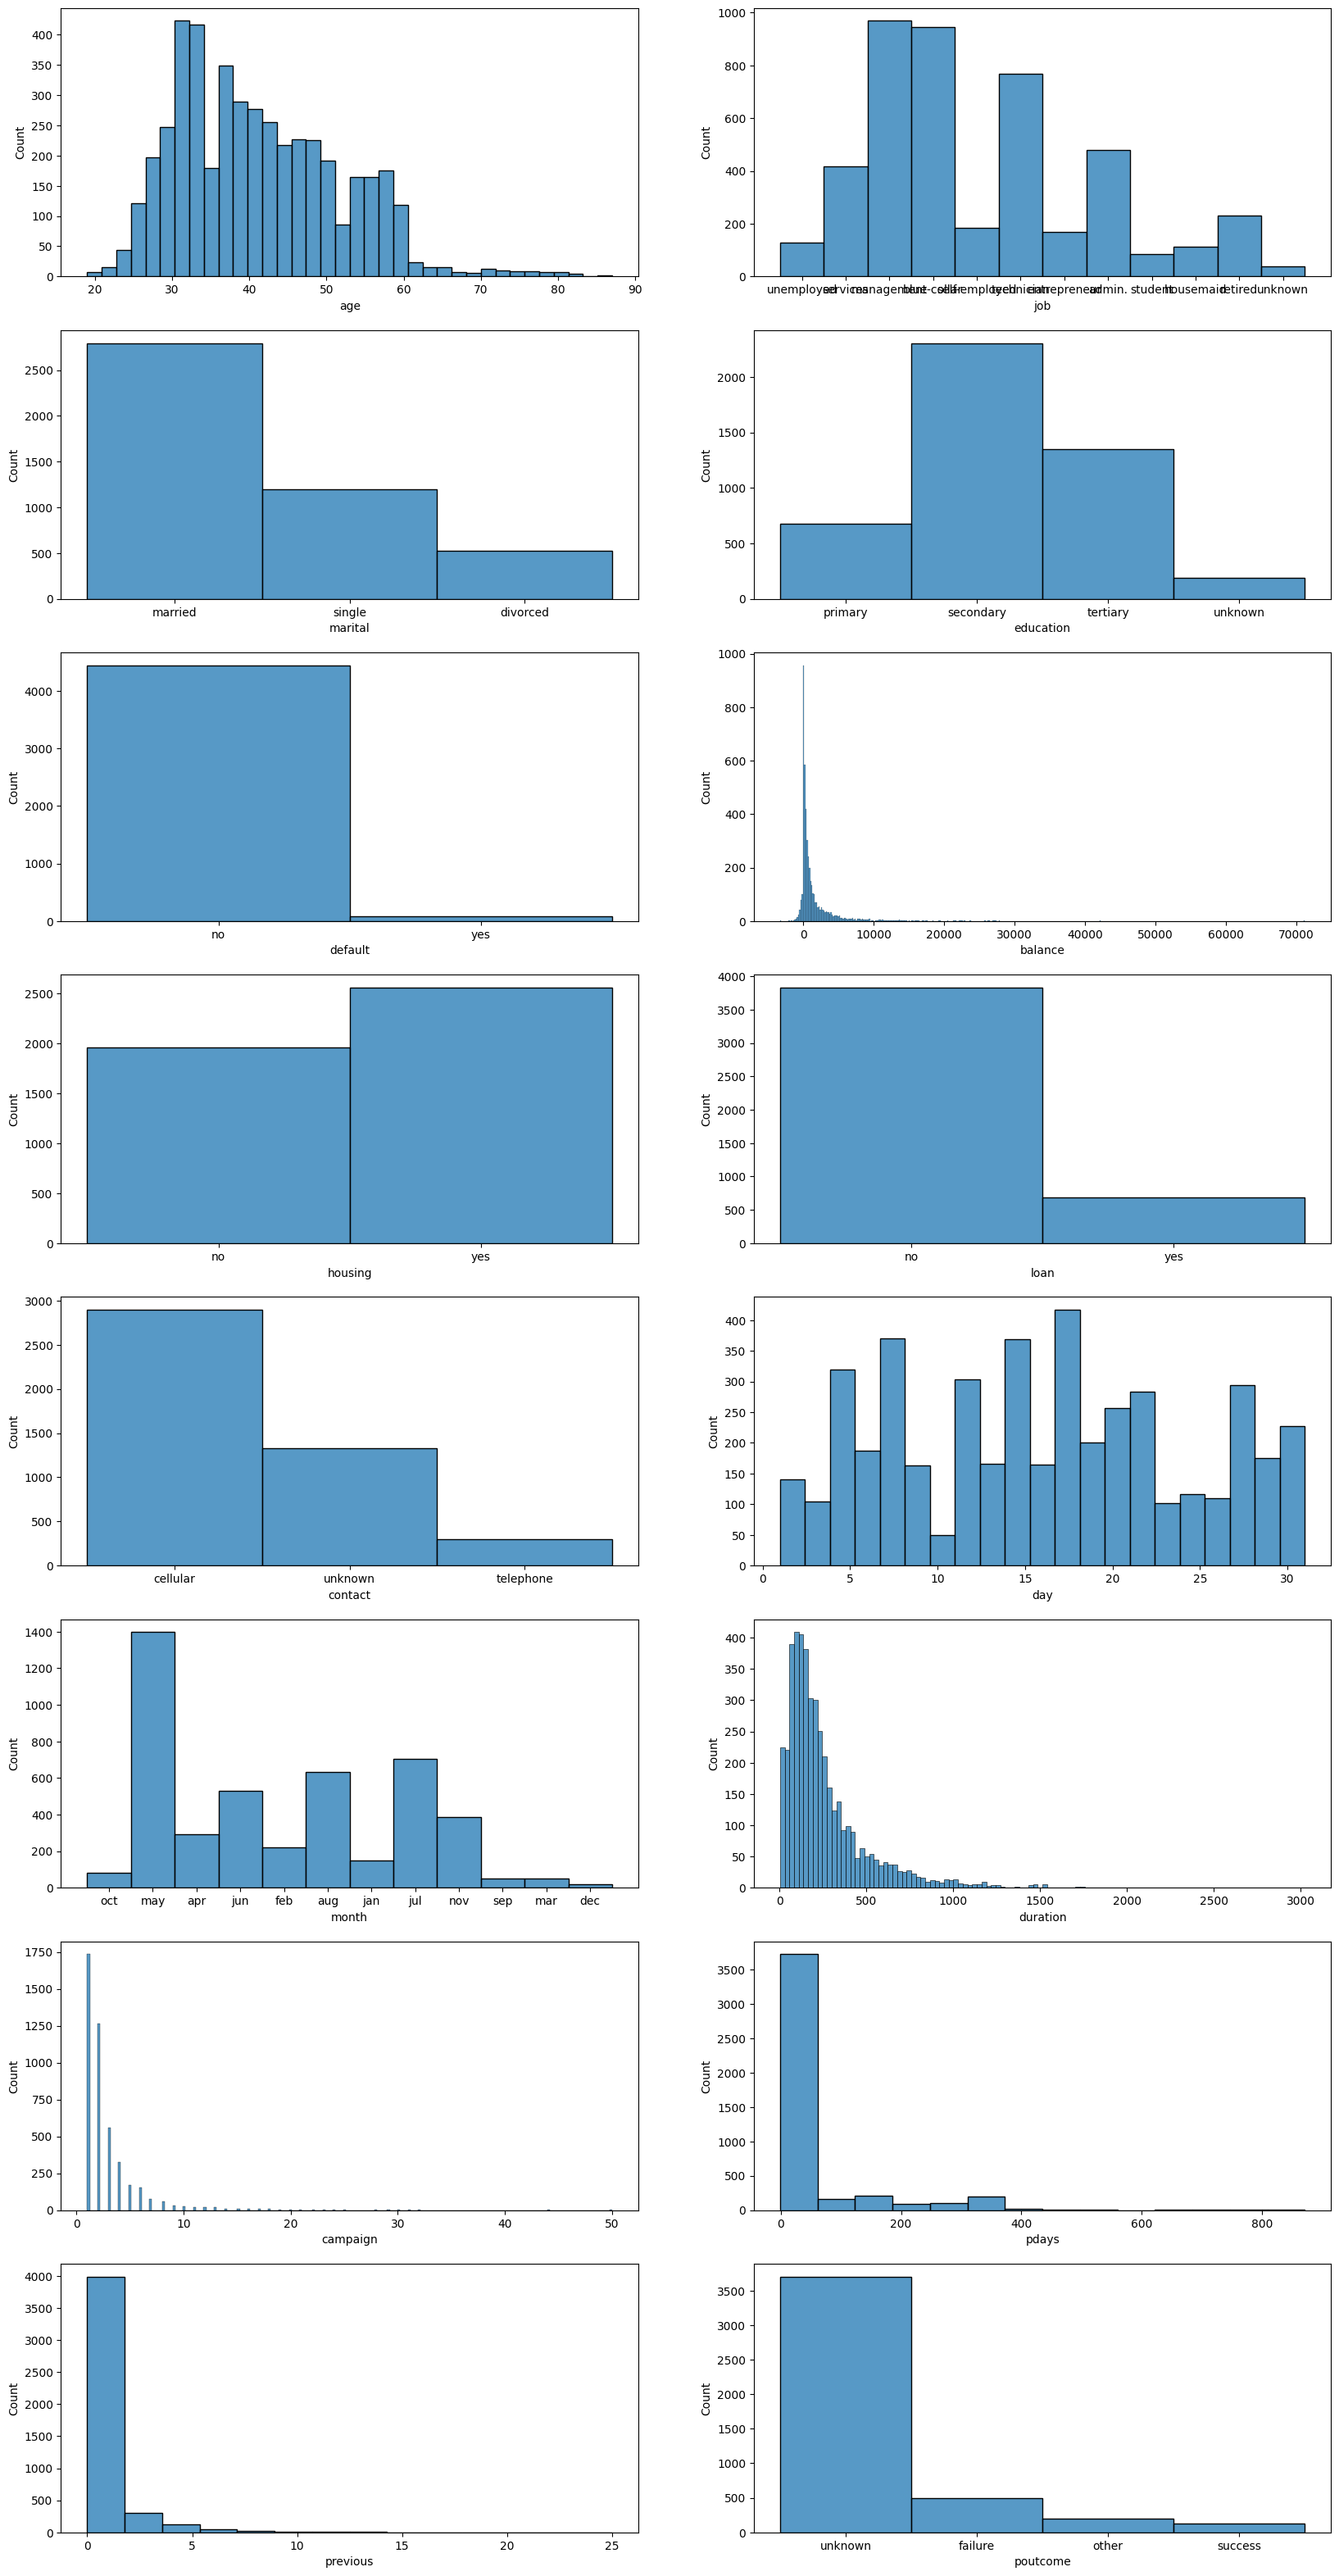

In [15]:
# See the distribution of data
fig = plt.figure(figsize=(20, 40))
cols = df.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 8 # Defines the number of rows
num_cols = 2 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.histplot(data=df, x=cols[index-1])
plt.show()

It can be seen more clearly from the visualization that there is skewness in the balance, campaign, and duration. There seems to be a bias towards 0 data for previous. This is likely to result from the absence of users that has previously been contacted.

#### 2. Data Correlation

Then we will do plotting using Pearson correlation to see visualization of correlation in numerical data.

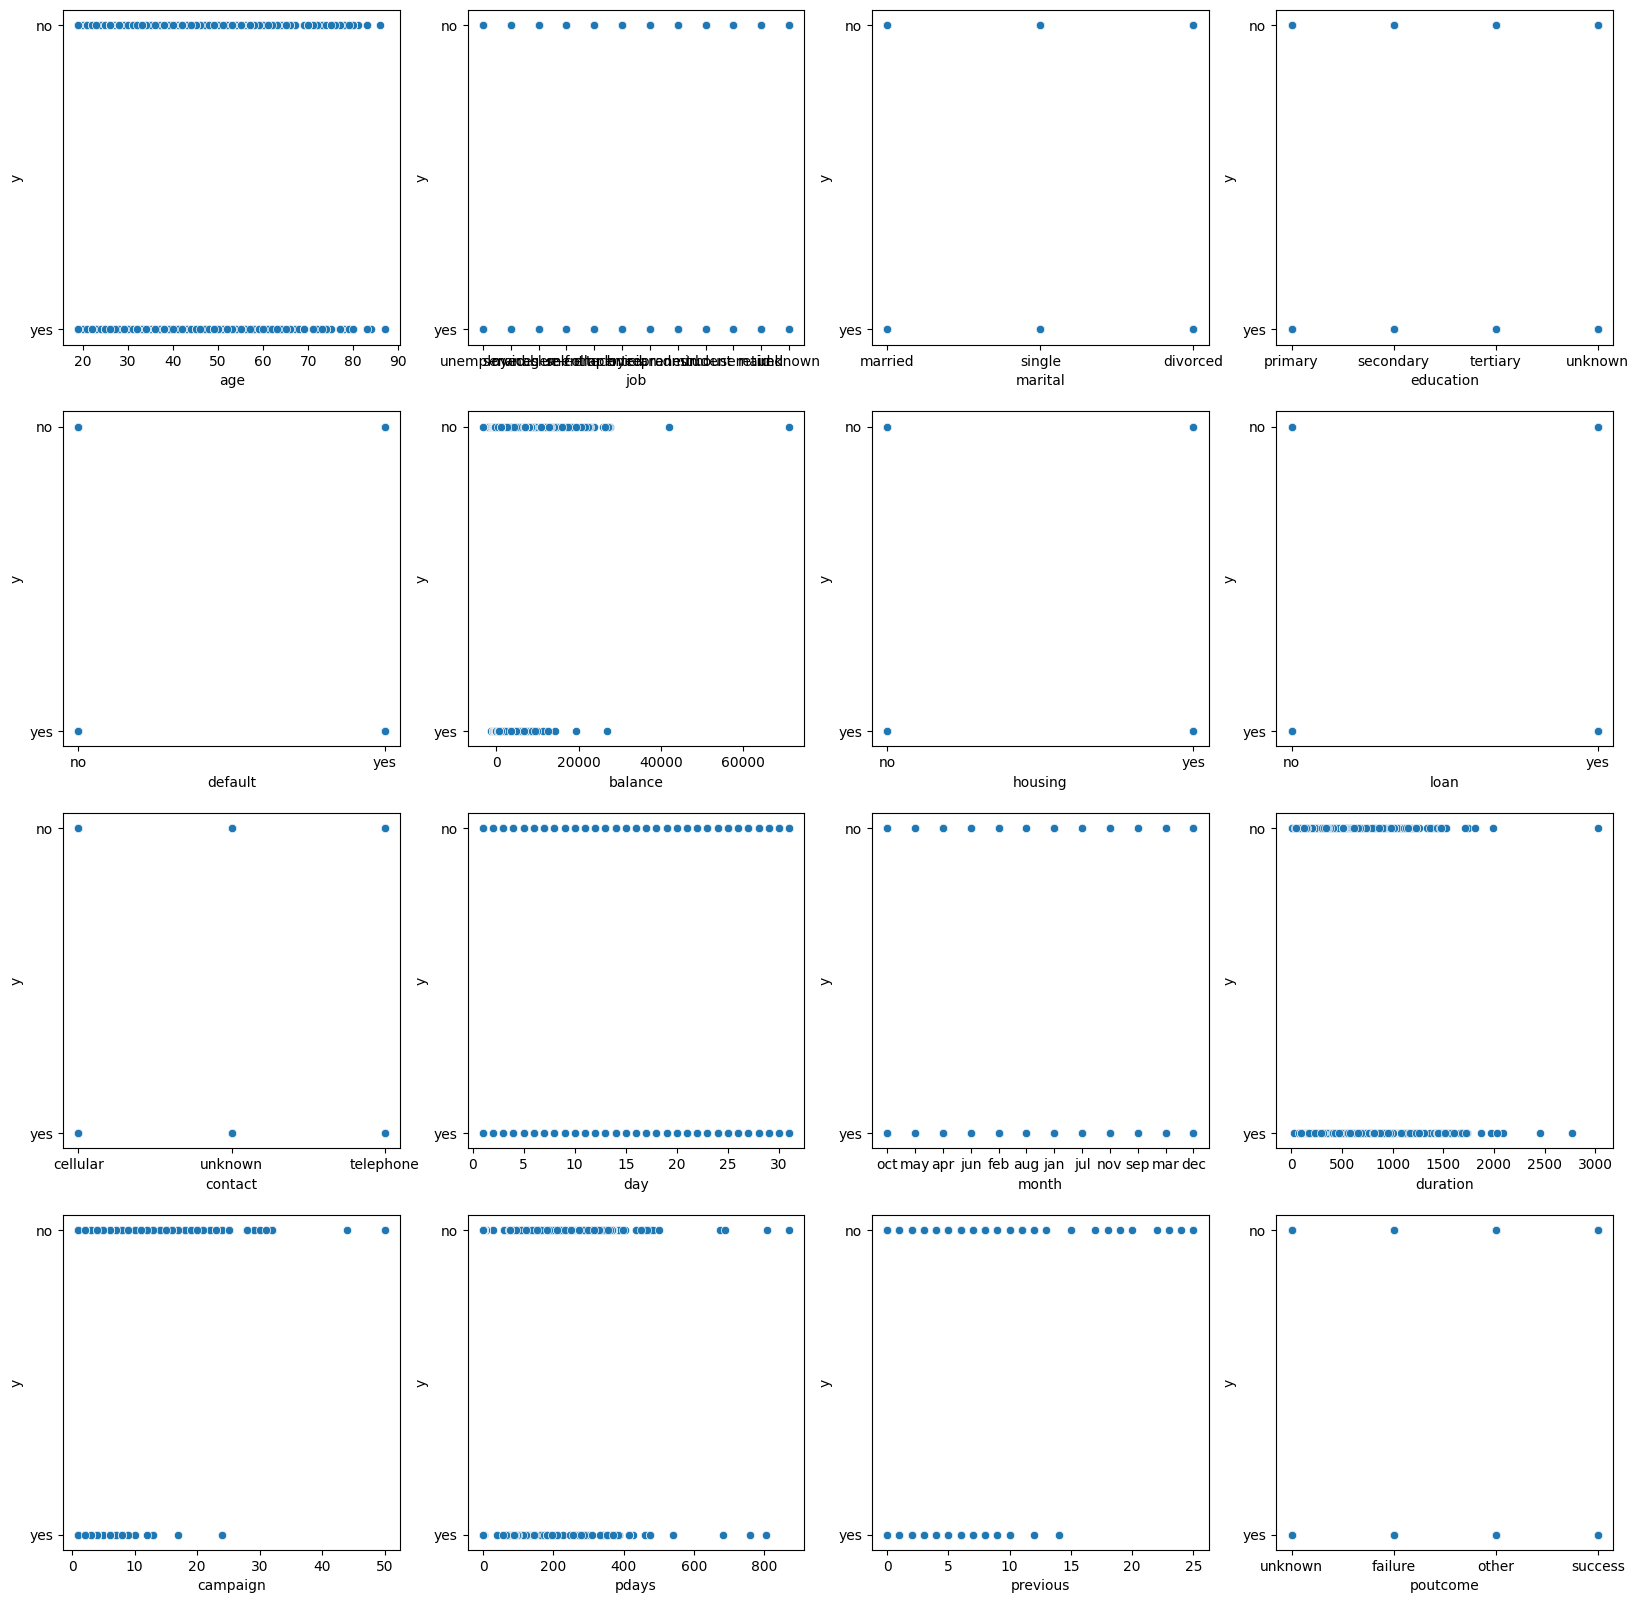

In [16]:
# Look at the distribution between the target variable and other variables
fig = plt.figure(figsize=(20, 20))
cols = df.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 4 # Defines the number of rows
num_cols = 4 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.scatterplot(data=df, x=cols[index-1], y='y')
plt.show()

From the visualization it can be seen that there is no linear correlation between features and y. It can also be seen that this happens because `y` only contains the value 1 or 0.

#### 3. Subscribed User

In [17]:
# Getting the subscribed user data
subscribed_df = df[(df['y'] == 'yes')]
# Show the data
subscribed_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes


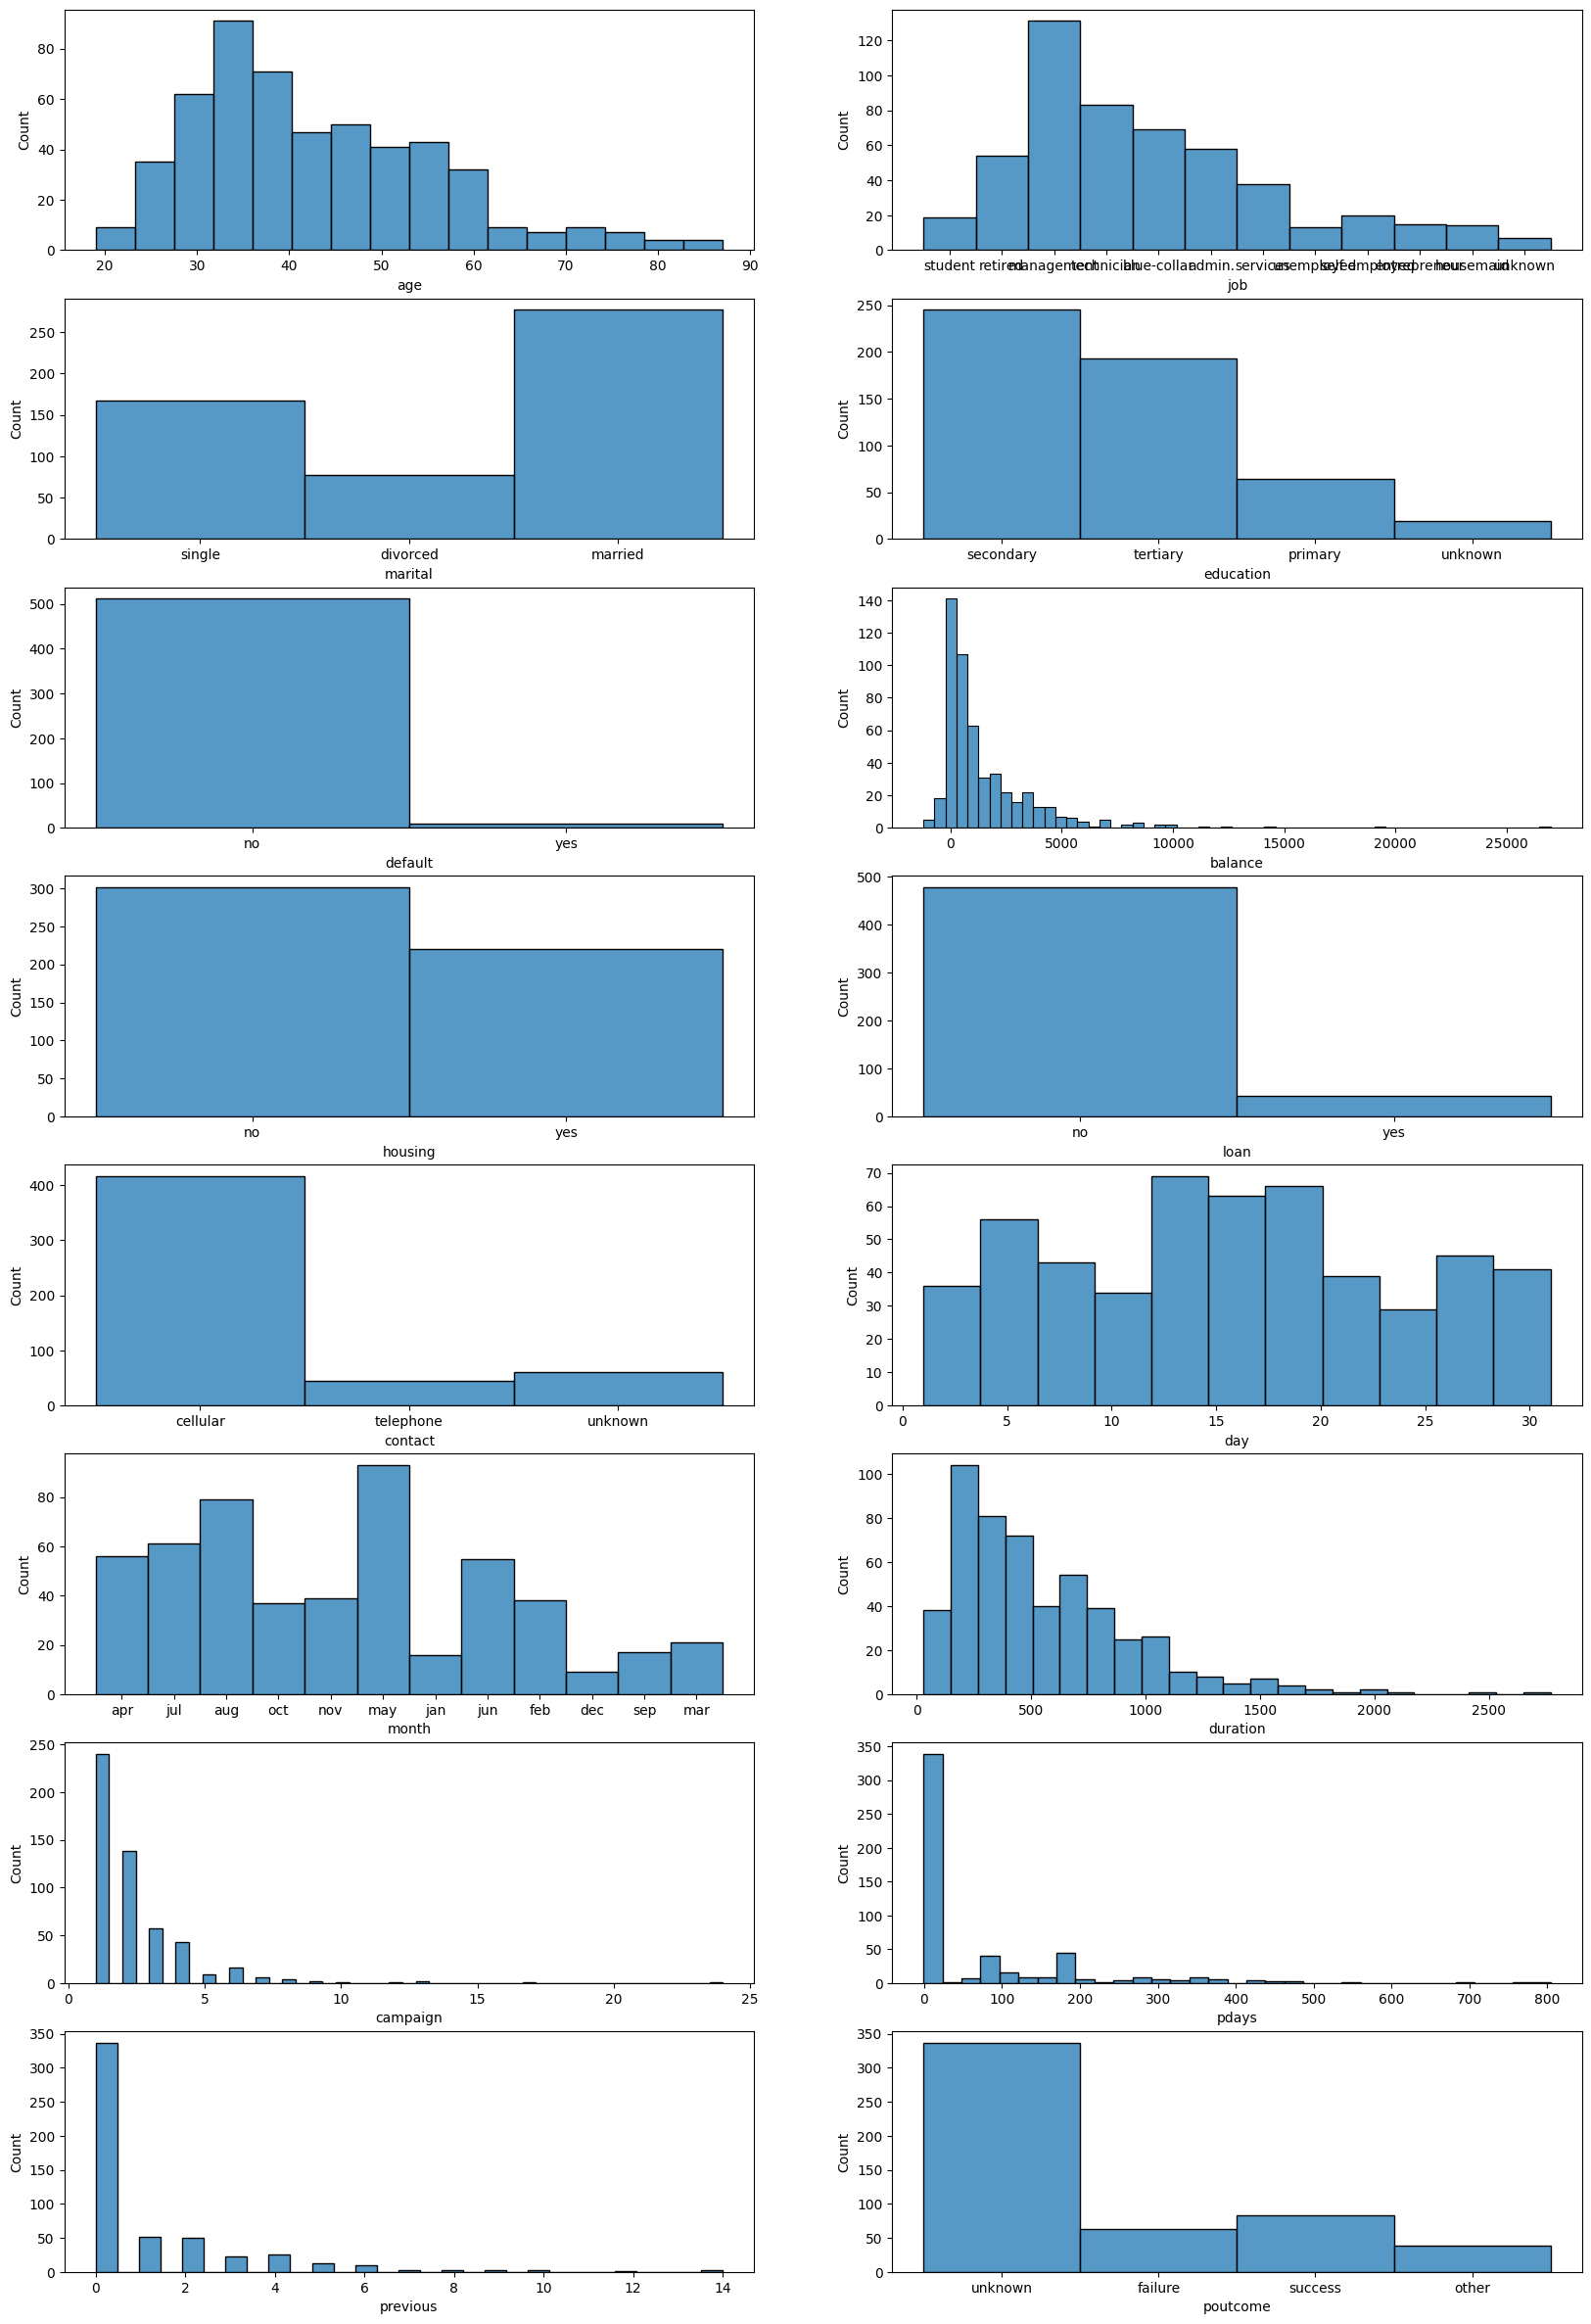

In [18]:
# See the distribution of data
fig = plt.figure(figsize=(20, 30))
cols = subscribed_df.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 8 # Defines the number of rows
num_cols = 2 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.histplot(data=subscribed_df, x=cols[index-1])
plt.show()

A couple of insights regarding subscribed users : <br>
- Age : The highest age range subscriber is at 30-40 years old
- Marital status : Mostly is married
- Education : Mostly on secondary education
- Month of subscribtion : Highest on May, however we can see a steady high value at April to August.
- Contact : Mostly contacted through cellular
- Loan : Mostly doesn't have another loan. Thus potentially able to put money to term deposit.
- Balance : Quite skewed at around 700-1000 balance. This means, users doen't need to have a really high amount of balance to be interested in term deposit.

In [19]:
# Check the central distribution of the data
subscribed_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211
std,13.115772,2444.398956,8.235148,390.325805,2.092071,121.963063,2.055368
min,19.000000,-1206.000000,1.000000,30.000000,1.000000,-1.000000,0.000000
25%,32.000000,171.000000,9.000000,260.000000,1.000000,-1.000000,0.000000
50%,40.000000,710.000000,15.000000,442.000000,2.000000,-1.000000,0.000000
75%,50.000000,2160.000000,22.000000,755.000000,3.000000,98.000000,2.000000
max,87.000000,26965.000000,31.000000,2769.000000,24.000000,804.000000,14.000000


We can see that most data (up to 50% of data) has pdays of -1 and previous of 0. It means that the user has not been contacted previously. This provides potential for users that have only been contacted on the first time to start subscribing.

So, the focus is at the telemarketer who market through the phone. They have at an average of 552 seconds or around 9 minutes to market the deposit term benefits and make user subscribe.

## Feature Engineering
This section contains the data preparation process for the model training process, such as dividing data into train-test, data transformation (normalization, encoding, etc.), and other necessary processes.

In [20]:
# Divide data into test and train data
df_train_init, df_test_init = train_test_split(df, test_size=0.4, random_state=42)

In [21]:
# Perform index reset
df_train_init = df_train_init.reset_index()
df_test_init = df_test_init.reset_index()

In [22]:
# Copy the data for further analysis
df_train = df_train_init.copy()
df_test = df_test_init.copy()

### Feature Selection

To select the features to use, we will divide the data into numerical and categorical. From the data it can be seen that all the data are numerical values. However, sometimes there are categorical features that are in numerical form. Therefore, we will check the data first.

#### Data Checking

In [23]:
# Check categorical data by checking the number of unique numerical values
for col in df_train.select_dtypes(include=['number']).columns.tolist():
    print(f"The number of unique data from {col} is {len(df_train[col].unique())}")

The number of unique data from index is 2712
The number of unique data from age is 64
The number of unique data from balance is 1667
The number of unique data from day is 31
The number of unique data from duration is 733
The number of unique data from campaign is 31
The number of unique data from pdays is 244
The number of unique data from previous is 22


From the data, due to the reset of index, an index column was created. This data has as many unique data as the length of the data. We have to drop this data.

Other than this, we can see a high unique value for other numerical data. Thus, showing no potential encoded categorical data here.

In [24]:
# Dropping identifier data
df_train = df_train.drop('index', axis=1)
df_test = df_test.drop('index', axis=1)

In [25]:
# Divide data into numerical and categorical
# Retrieving numerical data
num_data = df_train[df_train.select_dtypes(exclude=['object']).columns.tolist()]
# Retrieves data that has the object data type
cat_data = df_train[df_train.select_dtypes(include=['object']).columns.tolist()]

Because there are 2 types of data, categorical and numerical with a categorical target, we will try to use ANOVA correlation for numerical - categorical and chi-squared test for categorical - categorical.

#### Numerical Data

##### ANOVA

In [26]:
# Perform ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
num_selected = selector.fit_transform(num_data, df_train['y'])

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get column names of selected features
selected_features = num_data.columns[selected_indices]
selected_features

Index(['duration', 'previous'], dtype='object')

We get the 2 best features is duration and previous.

#### Categorical Data

##### Chi-squared Correlation
Chi-squared correlation is used to see the correlation between categorical input and categorical output.

In [27]:
# Perform correlation calculations
cols = cat_data.columns

for col in cols:
  cross = pd.crosstab(cat_data[col],cat_data['y'])
  pval = stats.chi2_contingency(cross).pvalue
  prompt = "and they are dependent" if pval<0.05 else ""
  print(f"P-value of {col} and Target: {pval} {prompt}")

P-value of job and Target: 1.0261811351508933e-06 and they are dependent
P-value of marital and Target: 0.04252586287126235 and they are dependent
P-value of education and Target: 0.05558734802362725 
P-value of default and Target: 0.7693907318463092 
P-value of housing and Target: 2.1652284578905783e-09 and they are dependent
P-value of loan and Target: 0.0013346788953065036 and they are dependent
P-value of contact and Target: 1.1018312894586214e-12 and they are dependent
P-value of month and Target: 2.8527270854013224e-32 and they are dependent
P-value of poutcome and Target: 1.709223199907903e-51 and they are dependent
P-value of y and Target: 0.0 and they are dependent


From the correlation results, it is found that job, marital, housing, loan, contact, month, and poutcome have a correlation with the default payment next month.

Because the number of features is too large and has the potential for overfitting, we will use the features with the smallest p-value, namely poutcome, contact, and housing. However, as the poutcome and contact data has a high unknown value (as previously stated), we will also add loan.

#### Feature customization
From the correlation results, the details of the features that will be used are obtained as follows.
- Numerical Data: duration, previous, and balance.
- Categorical Data: poutcome, contact, housing, and loan.

In [28]:
# Adjust x_train and x_test to the selected features
df_train = df_train[['duration','previous','balance','poutcome','contact','housing','loan','y']]
df_test = df_test[['duration','previous','balance','poutcome','contact','housing','loan','y']]
# View df_train results
df_train.head()

,duration,previous,balance,poutcome,contact,housing,loan,y
0,348,0,574,unknown,cellular,no,no,no
1,171,0,14,unknown,unknown,yes,no,no
2,95,0,856,unknown,cellular,yes,yes,no
3,656,0,0,unknown,cellular,no,no,no
4,43,0,887,unknown,unknown,no,no,no


### Missing Values Handling

In [29]:
# Check the unknown value for all columns
print("The number of unknown value :")
for var in df_train.columns:
    print(f"{var} : {df_train[df_train[var]=='unknown'][var].count()}")

The number of unknown value :
duration : 0
previous : 0
balance : 0
poutcome : 2214
contact : 787
housing : 0
loan : 0
y : 0


As seen previously, there are unknown values ​​in the outcome and contact data. This can lead to underrepresentation of information and affect model results.

So we will try to look at the unique value and also the percentage of unknown values ​​in the overall data.

In [30]:
# View unique values ​​from both columns
unknown_col = ['poutcome','contact']
for var in unknown_col :
    print(f"Unique value from {var} : {df_train[var].unique()}")

Unique value from poutcome : ['unknown' 'other' 'success' 'failure']
Unique value from contact : ['cellular' 'unknown' 'telephone']


In [31]:
# View the percentage of unknown values ​​from the entire data
for var in unknown_col :
    print(f"Percentage of unknwon data from {var} : {(df_train[df_train[var]=='unknown'][var].count())/(len(df_train[var]))*100} %")

Percentage of unknwon data from poutcome : 81.63716814159292 %
Percentage of unknwon data from contact : 29.019174041297934 %


As the data of the unknown is quite high, it is not an option to drop the data. Also, imputing it with the most frequent one or other imputation methods might lead to a data bias. Thus, we will either leave the data of unknown as is or not use the column as it might not give a lot of insight.

We should check the data of these unknown data before proceeding.

#### Data Analysis

In [32]:
# Get the unknown data
df_unknown = df_train[(df_train['poutcome']=='unknown') | (df_train['contact']=='unknown')]
# Show the df_unknown
df_unknown

,duration,previous,balance,poutcome,contact,housing,loan,y
0,348,0,574,unknown,cellular,no,no,no
1,171,0,14,unknown,unknown,yes,no,no
2,95,0,856,unknown,cellular,yes,yes,no
3,656,0,0,unknown,cellular,no,no,no
4,43,0,887,unknown,unknown,no,no,no
...,...,...,...,...,...,...,...,...
2706,187,0,2974,unknown,unknown,yes,no,no
2707,54,0,1536,unknown,cellular,no,no,no
2708,748,0,-370,unknown,unknown,yes,no,no
2710,71,0,440,unknown,cellular,no,no,no


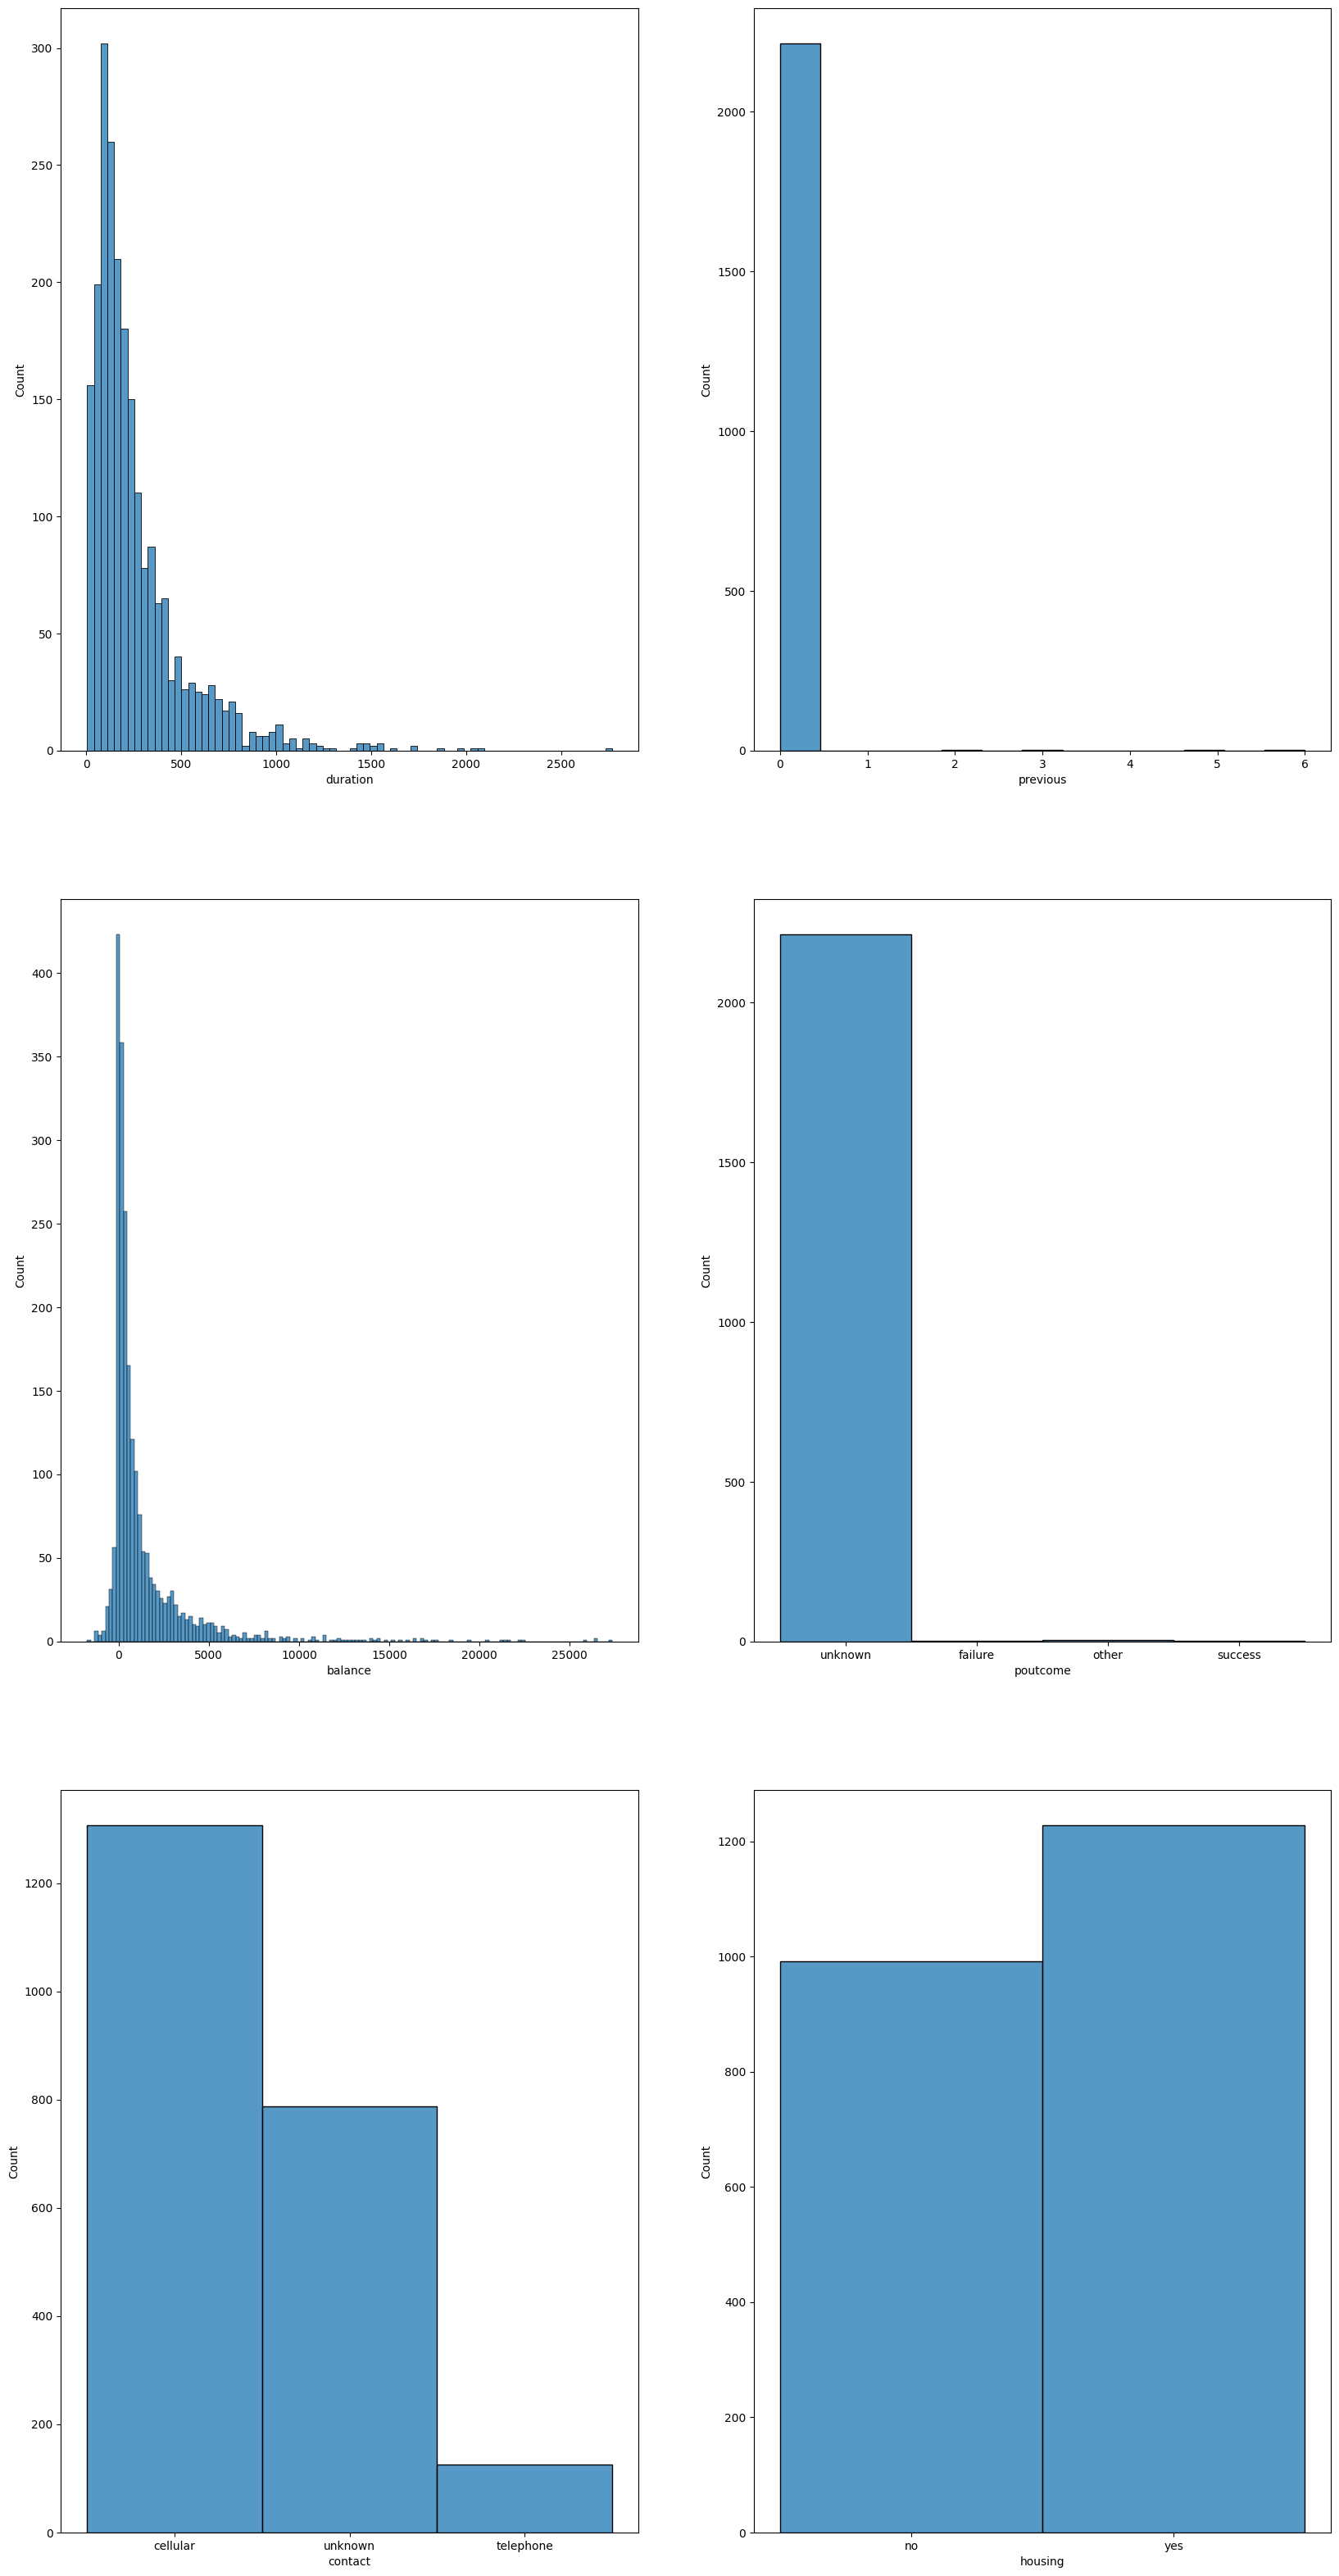

In [33]:
# See the distribution of data
fig = plt.figure(figsize=(20, 40))
cols = df_unknown.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 3 # Defines the number of rows
num_cols = 2 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.histplot(data=df_unknown, x=cols[index-1])
plt.show()

From the visualization we can see that most of the data has a `previous` data of 0 or under 0. Which can indicate that since the person has not been contacted previously, it will not have a result regarding the call.

In [34]:
# We further check the value count for the previous column
df_unknown['previous'].value_counts()

previous
0    2214
3       2
2       2
6       1
5       1
Name: count, dtype: int64

As we can see, the number of people who has a `previous` value of 0 corresponse to the number of people who has an unknown in their poutcome. Which is at 2214 row data.

This means that the data is **Missing Not at Random (MNAR)**. With the recommendation for categorical variable to add Missing Label Imputation.

#### Data Imputation
As previously stated, we will capture the missing value by adding a variable with binary value for the data with `unknown` data (1) and non `unknown` data (0).

This imputation process might lead to distortion of the original distribution of the variable. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution. As the missingness of data of poutcome is higher than contact, we will be imputing the poutcome column.

In [35]:
# Creating a function for imputation
def null_imputer(df, variable, null_value):
    df[variable+'_NA'] = np.where(df[variable] == null_value, 1, 0)
    return df

In [36]:
# Impute df_train and df_test for poutcome column
# Define a new dataframe for imputation
df_train_impute = df_train.copy()
df_test_impute = df_test.copy()
# Defining column to be imputed
impute_column = ['poutcome']
# Iterating through the value for imputation
for var in impute_column:
    null_imputer(df_train_impute, var, 'unknown')
    null_imputer(df_test_impute, var, 'unknown')
df_train_impute.head()

,duration,previous,balance,poutcome,contact,housing,loan,y,poutcome_NA
0,348,0,574,unknown,cellular,no,no,no,1
1,171,0,14,unknown,unknown,yes,no,no,1
2,95,0,856,unknown,cellular,yes,yes,no,1
3,656,0,0,unknown,cellular,no,no,no,1
4,43,0,887,unknown,unknown,no,no,no,1


In [37]:
# Checking the value count
df_train_impute['poutcome_NA'].value_counts()

poutcome_NA
1    2214
0     498
Name: count, dtype: int64

### Outlier Handling

In [38]:
# View the available columns in df_train
df_train_impute.columns

Index(['duration', 'previous', 'balance', 'poutcome', 'contact', 'housing',
       'loan', 'y', 'poutcome_NA'],
      dtype='object')

#### Feature Visualization
In the feature visualization we will see the distribution of outliers and see the skewness of the data. If the skew value < -1 or skew > 1 then the data is highly skewed and not normally distributed.

In [39]:
# Function to create histograms and boxplots.
# This function takes an input dataframe (df) and feature variables as arguments.

def diagnostic_plots(df, variable):
    # View the data skew value
    print(f"Nilai skewness dari data {variable} adalah {df[variable].skew()}")

    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Nilai skewness dari data duration adalah 2.5809171506012034


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


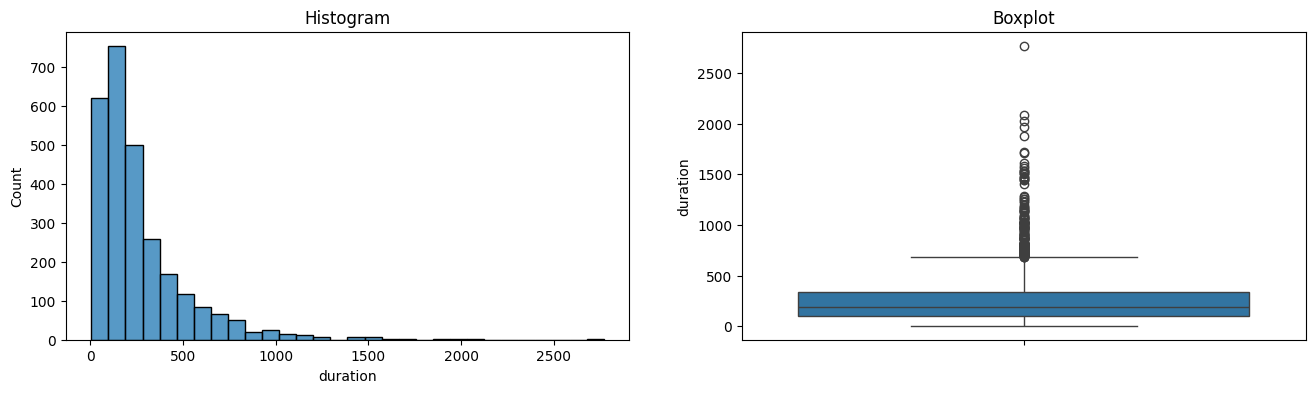

Nilai skewness dari data previous adalah 5.918360623054649


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


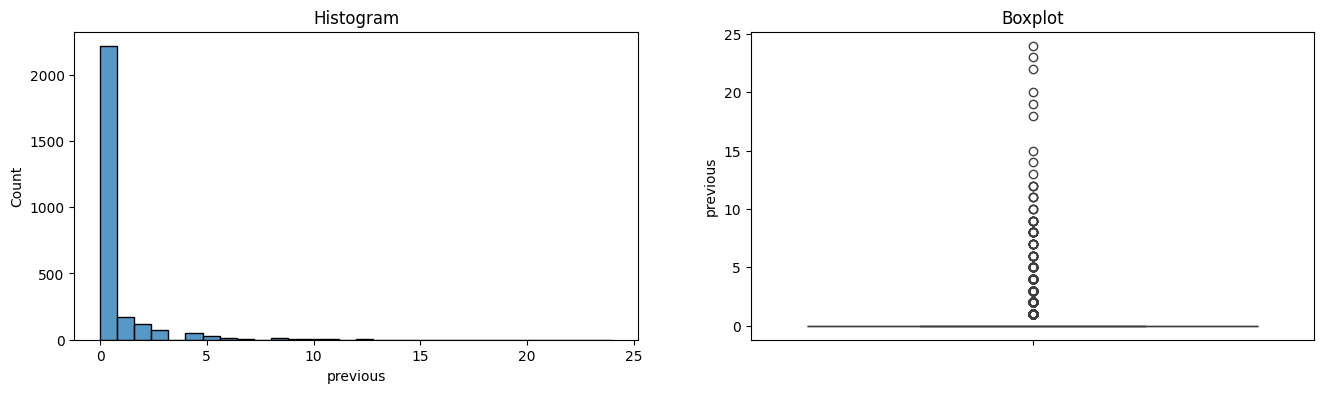

Nilai skewness dari data balance adalah 4.320678308453579


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


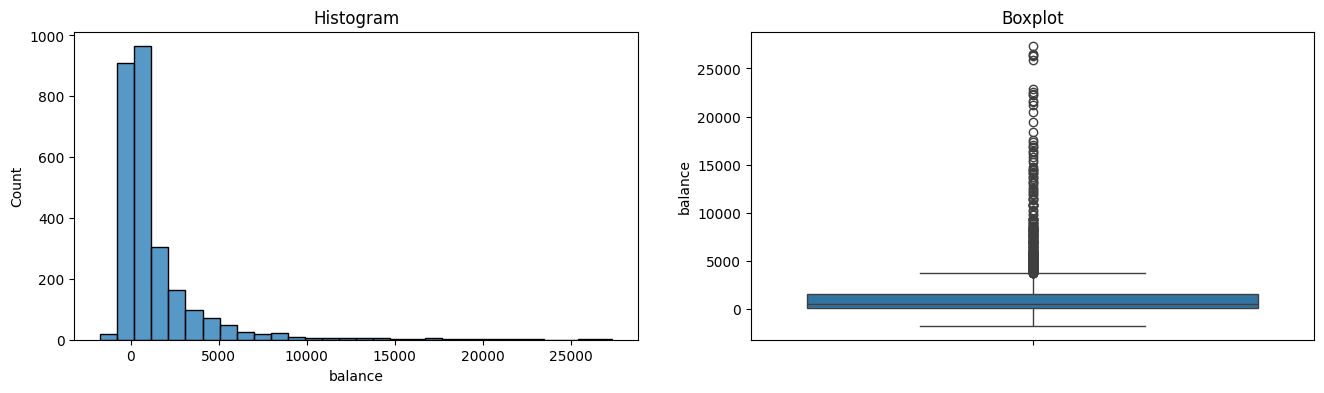

Nilai skewness dari data poutcome_NA adalah -1.6351368813205025


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


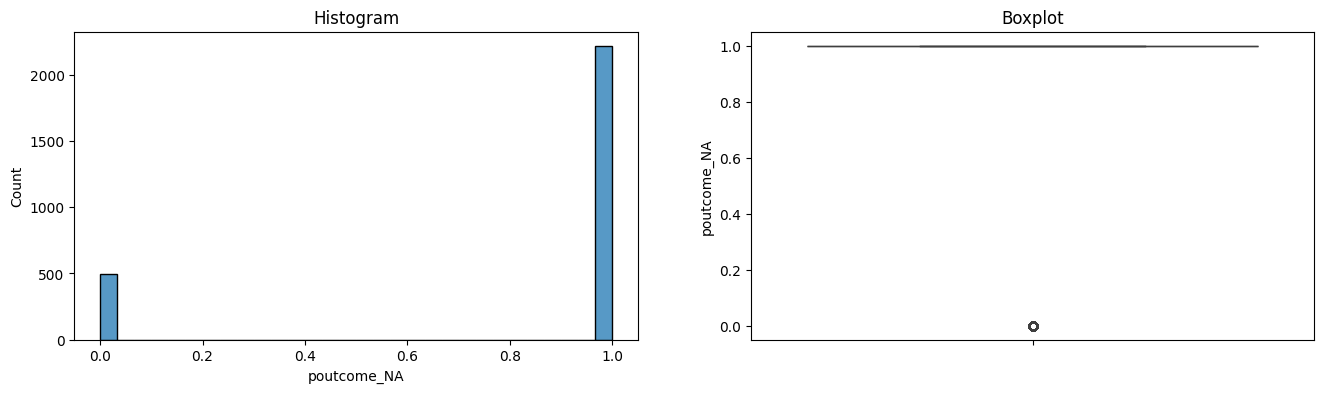

In [40]:
# Displays the distribution of outliers in the data
# Get the numerical value data
num_data = df_train_impute[df_train_impute.select_dtypes(exclude=['object']).columns.tolist()]
# Visualize the data
for kolom in num_data.columns:
    diagnostic_plots(num_data, kolom)

From the visualization results and skew values, it is found that: <br>
- Skewed data : duration, previous

In [41]:
# Enter the list of features into the list according to type
skew_data = ['duration', 'previous']

#### Outlier Detection
From the two types of data distribution, there are differences in how to detect outliers. Normally distributed data will be checked using z-score and skewed data will use Tukey's Rule. However, because the data available is only skewed, only the Tukey rule will be used. Then the percentage of outliers from the total data will be displayed to consider the handling that will be carried out.

In [42]:
# Defines a function to calculate the outlier percentage
def outlier_perc(df, variable, lower_boundary, upper_boundary):
    #Classify outlier and non-outlier data
    outlier = df[((df[variable] < lower_boundary)|(df[variable] > upper_boundary))]
    no_outlier = df[~((df[variable] < lower_boundary)|(df[variable] > upper_boundary))]
    # Calculate the percentage of outliers
    print(f'Percentage of outliers for {variable}: {len(outlier)*100/len(df):.2f}%')

##### Skewed Distribution

In [43]:
# Defines a function to calculate Tukey's Rule
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [44]:
# Check the outlier percentage of each skewed distribution variable
for kolom in skew_data :
    # Find the lower and upper boundaries of the data
    upper_boundary, lower_boundary = find_skewed_boundaries(df, kolom, 1.5)
    # Calculate and display the percentage of outliers in the data
    outlier_perc(df, kolom, lower_boundary, upper_boundary)

Percentage of outliers for duration: 7.30%
Percentage of outliers for previous: 18.05%


From the outlier percentage results, it can be seen that the outlier values ​​available in the data are > 5%. Therefore, outlier handling will be carried out.

However, there is an exception to previous because it has quite low variation (the effect of data 0 is quite high).

#### Outlier Handling
Because the initial data is relatively small, we cannot do dropping directly. Capping will be carried out to handle outliers.

Capping is done using a winsorizer. There are several parameters that can be set. Because duration data is skewed data, we will use the IQR capping method.


In [45]:
# Defines the variable that will be capped
var_to_cap = ['duration']
# Create a winsorizer using the IQR method
winsorizer = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=3,
                        variables=var_to_cap,
                        missing_values='ignore')
# Perform fitting and transformation on train and test data
df_train_capped = winsorizer.fit_transform(df_train_impute)
df_test_capped = winsorizer.transform(df_test_impute)

In [46]:
# Create a function to visualize before and after capping
def cap_before_after(df_before, df_after, variable):
    print(f'\n{variable} - Before Capping')
    diagnostic_plots(df_before, variable)

    print(f'\n{variable} - After Capping')
    diagnostic_plots(df_after, variable)


duration - Before Capping
Nilai skewness dari data duration adalah 2.5809171506012034


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


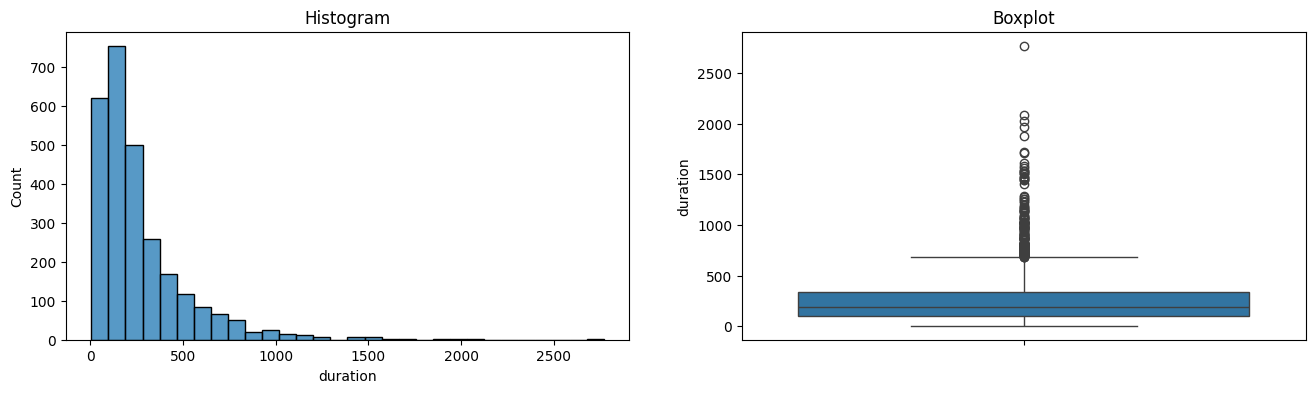


duration - After Capping
Nilai skewness dari data duration adalah 1.6226692685246735


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


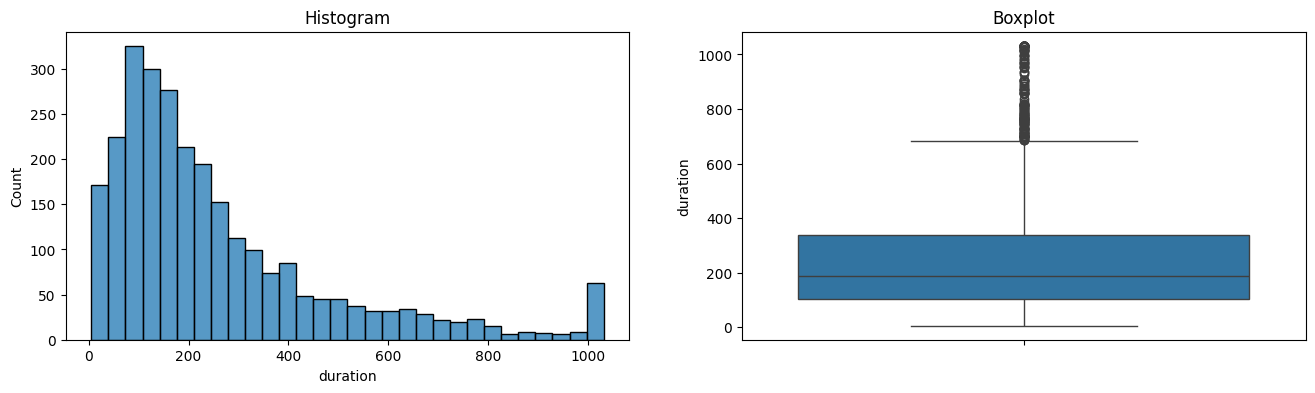

In [47]:
# Check distribution before and after capping
for var in var_to_cap:
    cap_before_after(df_train_impute, df_train_capped, var)

It can be seen after capping that the data is more distributed and the skewness value has been much reduced.

### Feature Transformation
Using pipeline and added encoding to help the places that cannot use pipeline.


#### Binary Encoding
Binary encoding is recommended for data with yes or no value. As the target and a couple of features in the categorical data has these values, we will create a binary encoding function as well.

In [48]:
# Define binary data
bin_columns = ['housing', 'loan', 'y']

# Define function for encoding
def binary_mapping(df, var):
    df[var+'_enc'] = df[var].map({'yes': 1, 'no': 0})
    return df

# Generate binary data using map
for var in bin_columns:
    binary_mapping(df_train_capped, var)
    binary_mapping(df_test_capped, var)

In [49]:
# Dropping initial data
df_train_cap_enc = df_train_capped.drop(columns=bin_columns)
df_test_cap_enc = df_test_capped.drop(columns=bin_columns)

In [50]:
# See the result
df_train_cap_enc.head()

,duration,previous,balance,poutcome,contact,poutcome_NA,housing_enc,loan_enc,y_enc
0,348,0,574,unknown,cellular,1,0,0,0
1,171,0,14,unknown,unknown,1,1,0,0
2,95,0,856,unknown,cellular,1,1,1,0
3,656,0,0,unknown,cellular,1,0,0,0
4,43,0,887,unknown,unknown,1,0,0,0


#### Pipeline
In the pipeline, we will incorporate the transformation of numerical and categorical data. Where numerical will undergo scaling and categorical data will use One Hot Encoding. This encoding is chosen because the rest of the categorical data has no order in their values.

After both data is transformed, we will use data balancing using SMOTE to balance out the data. This will help as the existing data is biased towards the 'no' or 0 outcome.

In [51]:
# Splitting the data to x and y
# For df_train
x_train = df_train_cap_enc.drop('y_enc', axis=1)
y_train = df_train_cap_enc['y_enc']
# For df_test
x_test = df_test_cap_enc.drop('y_enc', axis=1)
y_test = df_test_cap_enc['y_enc']

In [52]:
# Get Numerical Columns and Categorical Columns
num_columns = x_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = ['poutcome', 'contact']

# Updating the data based on the imputation column (which is categorical and already encoded)
num_columns.remove('poutcome_NA')
num_columns.remove('housing_enc')
num_columns.remove('loan_enc')

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['duration', 'previous', 'balance']
Categorical Columns :  ['poutcome', 'contact']


In [53]:
# Create A Pipeline

# Define column transformation steps
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# Define data balancing step
balancer = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)

# Create a pipeline by chaining together column transformation, data balancing, and dimensionality reduction steps
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('smote', SMOTE()),  # Add SMOTE for data balancing
])

In [54]:
# Fitting the train data
result_pipeline = pipeline.fit(x_train, y_train)
result_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE())])

## Model Definition

The model used to predict customer subscription to term deposit using a classification model that includes Random Forest, SVM, KNN, Decision Tree, and Boosting (There is Boost and Gradient Boost).

These models were chosen because: <br>
- Random Forest is favored for classification because it combines multiple decision trees to provide accurate predictions, mitigates overfitting, highlights important features, and handles missing data well.
- K-Nearest Neighbors (KNN) is generally used because of its intuitive concept, ability to handle non-linear data, and its usefulness in binary and multiclass classification.
- Support Vector Machines, especially SVCs, are effective in high dimensional spaces, tend to have advantages in dealing with overfitting, and support the use of various kernels to handle linear and non-linear separation problems.
- Decision Tree are easy to interpret, handle nonlinear relationships well, provide feature importance insights, handle missing data, and scale efficiently for large datasets.

Several models are used to be able to see the results of our data type regarding the various advantages and disadvantages of each model. We also then need to specify the metrics to be used.

**Metric Determination**

As we want to predict customer subscription, we see the risk and impact of the false classifications : <br>
- False Negative : Users who subscribe but predicted as not subscribe. Might cause confusion and complaint from user side.
- False Positive : Non subscriber but predicted as subscribe. Will not impact if not used by users, potential allocation from bank.

However, as we see that both is actually quite impactful. Thus, we use f1-score which harmonize both precision and recall.

## Baseline Model
In this section, model training and evaluation will be carried out on the baseline model (not yet tuned).

### Model Training
In this section, training data is carried out into the model. The models used are Random Forest, SVM, KNN, and Decision Tree.

#### Random Forest

In [55]:
# Define the classifier
classifier = RandomForestClassifier(random_state = 42)

In [56]:
# Create the pipeline for model
model_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('smote', SMOTE()),  # Add SMOTE for data balancing
    ('classifier', classifier)
])

In [57]:
# Model training
model_rf = model_rf.fit(x_train, y_train)
model_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [58]:
# Create cross validation
cv_scores_rf = cross_val_score(model_rf, x_train, y_train, cv=5, scoring="f1")

#### SVM

In [59]:
# Define the classifier
classifier2 = SVC(kernel='rbf')

In [60]:
# Create the pipeline for model
model_svc = ImbPipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('smote', SMOTE()),  # Add SMOTE for data balancing
    ('classifier', classifier2)
])

In [61]:
# Model training
model_svc = model_svc.fit(x_train, y_train)
model_svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()), ('classifier', SVC())])

In [62]:
# Create cross validation
cv_scores_svc = cross_val_score(model_svc, x_train, y_train, cv=5, scoring="f1")

#### KNN

In [63]:
# Define the classifier
classifier3 = KNeighborsClassifier()

In [64]:
# Create the pipeline for model
model_knn = ImbPipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('smote', SMOTE()),  # Add SMOTE for data balancing
    ('classifier', classifier3)
])

In [65]:
# Model training
model_knn = model_knn.fit(x_train, y_train)
model_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()), ('classifier', KNeighborsClassifier())])

In [66]:
# Create cross validation
cv_scores_knn = cross_val_score(model_knn, x_train, y_train, cv=5, scoring="f1")

#### Decision Tree

In [67]:
# Define the classifier
classifier4 = DecisionTreeClassifier(max_depth=6, random_state=42)

In [68]:
# Create the pipeline for model
model_dt = ImbPipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('smote', SMOTE()),  # Add SMOTE for data balancing
    ('classifier', classifier4)
])

In [69]:
# Model training
model_dt = model_dt.fit(x_train, y_train)
model_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [70]:
# Create cross validation
cv_scores_dt = cross_val_score(model_dt, x_train, y_train, cv=5, scoring="f1")

#### Boosting

##### Ada Boosting

In [71]:
# Define boosting model
classifier5 = AdaBoostClassifier(
    SVC(kernel='rbf', probability=True, random_state=42),
    n_estimators=10,
    random_state=42)

In [72]:
# Create the pipeline for model
model_ada = ImbPipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('smote', SMOTE()),  # Add SMOTE for data balancing
    ('classifier', classifier5)
])

In [73]:
# Model training
model_ada = model_ada.fit(x_train, y_train)
model_ada

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()),
                ('classifier',
                 AdaBoostClassifier(estimator=SVC(probability=True,
                                                  random_state=42),
                                    n_estimators=10, random_state=42))])

In [74]:
# Create cross validation
cv_scores_ada = cross_val_score(model_ada, x_train, y_train, cv=5, scoring="f1")

##### Gradient Booster

In [75]:
# Define boosting model
classifier6 = GradientBoostingClassifier(random_state = 42)

In [76]:
# Create the pipeline for model
model_grad = ImbPipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('smote', SMOTE()),  # Add SMOTE for data balancing
    ('classifier', classifier6)
])

In [77]:
# Model training
model_grad = model_grad.fit(x_train, y_train)
model_grad

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [78]:
# Create cross validation
cv_scores_grad = cross_val_score(model_grad, x_train, y_train, cv=5, scoring="f1")

### Model Evaluation
In the baseline model, checks will be carried out for the five models by comparing the cross val results with predictions to see which models have good fit and can continue to carry out hyperparameter tuning.

In [79]:
# Create a dictionary to store the results of the data

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, cross_val, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'cross val f1 score mean' : cross_val.mean(),
      'cross val f1 score std' : cross_val.std(),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

#### Random Forest

In [80]:
# Checking Model Performance compared to Train-Set

y_pred_train_rf = model_rf.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_rf), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_rf), '\n')

F1 Score - Train Set  :  0.9939939939939939 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2380
           1       0.99      1.00      0.99       332

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712
 



In [81]:
# Shows evaluation for Random Forest cross validation
print('F1 Score - All - Cross Validation  : ', cv_scores_rf)
print('F1 Score - Mean - Cross Validation : ', cv_scores_rf.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_rf.std())
print('F1 Score - Range of Test-Set       : ', (cv_scores_rf.mean()-cv_scores_rf.std()) , '-', (cv_scores_rf.mean()+cv_scores_rf.std()))

F1 Score - All - Cross Validation  :  [0.47953216 0.39130435 0.33513514 0.41509434 0.36756757]
F1 Score - Mean - Cross Validation :  0.3977267107788242
F1 Score - Std - Cross Validation  :  0.04870788985980259
F1 Score - Range of Test-Set       :  0.34901882091902164 - 0.4464346006386268


In [82]:
# Checking performance against the test set

y_pred_test_rf = model_rf.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_rf), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf), '\n')

F1 Score - Test Set   :  0.40227703984819735 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      1620
           1       0.31      0.56      0.40       189

    accuracy                           0.83      1809
   macro avg       0.63      0.71      0.65      1809
weighted avg       0.88      0.83      0.85      1809
 



In [83]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_rf, cv_scores_rf, y_test, y_pred_test_rf, 'Random Forest')
pd.DataFrame(all_reports)

,Random Forest
train - precision,0.991018
train - recall,0.996988
train - accuracy,0.998525
train - f1_score,0.993994
cross val f1 score mean,0.397727
cross val f1 score std,0.048708
test - precision,0.313609
test - recall,0.560847
test - accuracy_score,0.825871
test - f1_score,0.402277


#### SVM

In [84]:
# Checking Model Performance compared to Train-Set

y_pred_train_svm = model_svc.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_svm), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_svm), '\n')

F1 Score - Train Set  :  0.4906716417910448 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.80      0.87      2380
           1       0.36      0.79      0.49       332

    accuracy                           0.80      2712
   macro avg       0.66      0.80      0.68      2712
weighted avg       0.89      0.80      0.83      2712
 



In [85]:
# Displays the evaluation for SVM cross validation
print('F1 Score - All - Cross Validation  : ', cv_scores_svc)
print('F1 Score - Mean - Cross Validation : ', cv_scores_svc.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_svc.std())
print('F1 Score - Range of Test-Set       : ', (cv_scores_svc.mean()-cv_scores_svc.std()) , '-', (cv_scores_svc.mean()+cv_scores_svc.std()))

F1 Score - All - Cross Validation  :  [0.52173913 0.45631068 0.44262295 0.5326087  0.39269406]
F1 Score - Mean - Cross Validation :  0.46919510408904397
F1 Score - Std - Cross Validation  :  0.051974330527531636
F1 Score - Range of Test-Set       :  0.4172207735615123 - 0.5211694346165756


In [86]:
# Checking performance against the test set

y_pred_test_svm = model_svc.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svm), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm), '\n')

F1 Score - Test Set   :  0.4676145339652449 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      1620
           1       0.33      0.78      0.47       189

    accuracy                           0.81      1809
   macro avg       0.65      0.80      0.68      1809
weighted avg       0.90      0.81      0.84      1809
 



In [87]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_svm, cv_scores_svc, y_test, y_pred_test_svm, 'SVM')
pd.DataFrame(all_reports)

,Random Forest,SVM
train - precision,0.991018,0.355405
train - recall,0.996988,0.792169
train - accuracy,0.998525,0.798673
train - f1_score,0.993994,0.490672
cross val f1 score mean,0.397727,0.469195
cross val f1 score std,0.048708,0.051974
test - precision,0.313609,0.333333
test - recall,0.560847,0.783069
test - accuracy_score,0.825871,0.813709
test - f1_score,0.402277,0.467615


#### KNN

In [88]:
# Checking Model Performance compared to Train-Set

y_pred_train_knn = model_knn.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_knn), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_knn), '\n')

F1 Score - Train Set  :  0.6208251473477406 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      2380
           1       0.46      0.95      0.62       332

    accuracy                           0.86      2712
   macro avg       0.73      0.90      0.77      2712
weighted avg       0.93      0.86      0.88      2712
 



In [89]:
# Displays the evaluation for cross validation knn
print('F1 Score - All - Cross Validation  : ', cv_scores_knn)
print('F1 Score - Mean - Cross Validation : ', cv_scores_knn.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_knn.std())
print('F1 Score - Range of Test-Set       : ', (cv_scores_knn.mean()-cv_scores_knn.std()) , '-', (cv_scores_knn.mean()+cv_scores_knn.std()))

F1 Score - All - Cross Validation  :  [0.49038462 0.37962963 0.37837838 0.45918367 0.35849057]
F1 Score - Mean - Cross Validation :  0.4132133725799494
F1 Score - Std - Cross Validation  :  0.051777600267519916
F1 Score - Range of Test-Set       :  0.36143577231242946 - 0.4649909728474693


In [90]:
# Checking performance against the test set

y_pred_test_knn = model_knn.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn), '\n')

F1 Score - Test Set   :  0.3903225806451613 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      1620
           1       0.28      0.64      0.39       189

    accuracy                           0.79      1809
   macro avg       0.62      0.72      0.63      1809
weighted avg       0.88      0.79      0.82      1809
 



In [91]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_knn, cv_scores_knn, y_test, y_pred_test_knn, 'KNN')
pd.DataFrame(all_reports)

,Random Forest,SVM,KNN
train - precision,0.991018,0.355405,0.460641
train - recall,0.996988,0.792169,0.951807
train - accuracy,0.998525,0.798673,0.857670
train - f1_score,0.993994,0.490672,0.620825
cross val f1 score mean,0.397727,0.469195,0.413213
cross val f1 score std,0.048708,0.051974,0.051778
test - precision,0.313609,0.333333,0.280742
test - recall,0.560847,0.783069,0.640212
test - accuracy_score,0.825871,0.813709,0.791045
test - f1_score,0.402277,0.467615,0.390323


#### Decision Tree

In [92]:
# Checking Model Performance compared to Train-Set

y_pred_train_dt = model_dt.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_dt), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_dt), '\n')

F1 Score - Train Set  :  0.4479878511769173 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.71      0.82      2380
           1       0.30      0.89      0.45       332

    accuracy                           0.73      2712
   macro avg       0.64      0.80      0.64      2712
weighted avg       0.90      0.73      0.78      2712
 



In [93]:
# Displays the evaluation for cross validation Decision Tree
print('F1 Score - All - Cross Validation  : ', cv_scores_dt)
print('F1 Score - Mean - Cross Validation : ', cv_scores_dt.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_dt.std())
print('F1 Score - Range of Test-Set       : ', (cv_scores_dt.mean()-cv_scores_dt.std()) , '-', (cv_scores_dt.mean()+cv_scores_dt.std()))

F1 Score - All - Cross Validation  :  [0.492891   0.3670412  0.41481481 0.49056604 0.34586466]
F1 Score - Mean - Cross Validation :  0.422235541593467
F1 Score - Std - Cross Validation  :  0.06098400418786108
F1 Score - Range of Test-Set       :  0.3612515374056059 - 0.4832195457813281


In [94]:
# Checking performance against the test set

y_pred_test_dt = model_dt.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_dt), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt), '\n')

F1 Score - Test Set   :  0.36658354114713215 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.71      0.82      1620
           1       0.24      0.78      0.37       189

    accuracy                           0.72      1809
   macro avg       0.60      0.75      0.59      1809
weighted avg       0.89      0.72      0.77      1809
 



In [95]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_dt, cv_scores_dt, y_test, y_pred_test_dt, 'Decision Tree')
pd.DataFrame(all_reports)

,Random Forest,SVM,KNN,Decision Tree
train - precision,0.991018,0.355405,0.460641,0.299492
train - recall,0.996988,0.792169,0.951807,0.888554
train - accuracy,0.998525,0.798673,0.857670,0.731932
train - f1_score,0.993994,0.490672,0.620825,0.447988
cross val f1 score mean,0.397727,0.469195,0.413213,0.422236
cross val f1 score std,0.048708,0.051974,0.051778,0.060984
test - precision,0.313609,0.333333,0.280742,0.239804
test - recall,0.560847,0.783069,0.640212,0.777778
test - accuracy_score,0.825871,0.813709,0.791045,0.719182
test - f1_score,0.402277,0.467615,0.390323,0.366584


#### Boosting

##### Ada Boosting

In [96]:
# Checking Model Performance compared to Train-Set

y_pred_train_ada = model_ada.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_ada), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_ada), '\n')

F1 Score - Train Set  :  0.39715048975957257 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      2380
           1       0.28      0.67      0.40       332

    accuracy                           0.75      2712
   macro avg       0.61      0.72      0.62      2712
weighted avg       0.86      0.75      0.79      2712
 



In [97]:
# Displays evaluation for existing cross validation
print('F1 Score - All - Cross Validation  : ', cv_scores_ada)
print('F1 Score - Mean - Cross Validation : ', cv_scores_ada.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_ada.std())
print('F1 Score - Range of Test-Set       : ', (cv_scores_ada.mean()-cv_scores_ada.std()) , '-', (cv_scores_ada.mean()+cv_scores_ada.std()))

F1 Score - All - Cross Validation  :  [0.47663551 0.39090909 0.51162791 0.43824701 0.3805668 ]
F1 Score - Mean - Cross Validation :  0.4395972650952302
F1 Score - Std - Cross Validation  :  0.04983412959102775
F1 Score - Range of Test-Set       :  0.3897631355042025 - 0.48943139468625796


In [98]:
# Checking performance against the test set

y_pred_test_ada = model_ada.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_ada), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_ada), '\n')

F1 Score - Test Set   :  0.37774524158125916 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.77      0.86      1620
           1       0.26      0.68      0.38       189

    accuracy                           0.77      1809
   macro avg       0.61      0.73      0.62      1809
weighted avg       0.88      0.77      0.81      1809
 



In [99]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_ada, cv_scores_ada, y_test, y_pred_test_ada, 'Ada Boost')
pd.DataFrame(all_reports)

,Random Forest,SVM,KNN,Decision Tree,Ada Boost
train - precision,0.991018,0.355405,0.460641,0.299492,0.281922
train - recall,0.996988,0.792169,0.951807,0.888554,0.671687
train - accuracy,0.998525,0.798673,0.857670,0.731932,0.750369
train - f1_score,0.993994,0.490672,0.620825,0.447988,0.397150
cross val f1 score mean,0.397727,0.469195,0.413213,0.422236,0.439597
cross val f1 score std,0.048708,0.051974,0.051778,0.060984,0.049834
test - precision,0.313609,0.333333,0.280742,0.239804,0.261134
test - recall,0.560847,0.783069,0.640212,0.777778,0.682540
test - accuracy_score,0.825871,0.813709,0.791045,0.719182,0.765064
test - f1_score,0.402277,0.467615,0.390323,0.366584,0.377745


##### Gradient Booster

In [100]:
# Checking Model Performance compared to Train-Set

y_pred_train_grad = model_grad.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_grad), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_grad), '\n')

F1 Score - Train Set  :  0.5136406396989651 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      2380
           1       0.37      0.82      0.51       332

    accuracy                           0.81      2712
   macro avg       0.67      0.81      0.70      2712
weighted avg       0.90      0.81      0.84      2712
 



In [101]:
# Displays the evaluation for gradient boost cross validation
print('F1 Score - All - Cross Validation  : ', cv_scores_grad)
print('F1 Score - Mean - Cross Validation : ', cv_scores_grad.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_grad.std())
print('F1 Score - Range of Test-Set       : ', (cv_scores_grad.mean()-cv_scores_grad.std()) , '-', (cv_scores_grad.mean()+cv_scores_grad.std()))

F1 Score - All - Cross Validation  :  [0.5047619  0.44131455 0.44976077 0.49019608 0.40692641]
F1 Score - Mean - Cross Validation :  0.45859194193210673
F1 Score - Std - Cross Validation  :  0.03514630060010005
F1 Score - Range of Test-Set       :  0.4234456413320067 - 0.4937382425322068


In [102]:
# Checking performance against the test set

y_pred_test_grad = model_grad.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_grad), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_grad), '\n')

F1 Score - Test Set   :  0.43328100470957615 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1620
           1       0.31      0.73      0.43       189

    accuracy                           0.80      1809
   macro avg       0.64      0.77      0.66      1809
weighted avg       0.89      0.80      0.83      1809
 



In [103]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_grad, cv_scores_grad, y_test, y_pred_test_grad, 'Gradient Boost')
pd.DataFrame(all_reports)

,Random Forest,SVM,KNN,Decision Tree,Ada Boost,Gradient Boost
train - precision,0.991018,0.355405,0.460641,0.299492,0.281922,0.373461
train - recall,0.996988,0.792169,0.951807,0.888554,0.671687,0.822289
train - accuracy,0.998525,0.798673,0.857670,0.731932,0.750369,0.809366
train - f1_score,0.993994,0.490672,0.620825,0.447988,0.397150,0.513641
cross val f1 score mean,0.397727,0.469195,0.413213,0.422236,0.439597,0.458592
cross val f1 score std,0.048708,0.051974,0.051778,0.060984,0.049834,0.035146
test - precision,0.313609,0.333333,0.280742,0.239804,0.261134,0.308036
test - recall,0.560847,0.783069,0.640212,0.777778,0.682540,0.730159
test - accuracy_score,0.825871,0.813709,0.791045,0.719182,0.765064,0.800442
test - f1_score,0.402277,0.467615,0.390323,0.366584,0.377745,0.433281


#### Baseline Evaluation Conclusion

In [104]:
# Displays the results of the model comparison
pd.DataFrame(all_reports)

,Random Forest,SVM,KNN,Decision Tree,Ada Boost,Gradient Boost
train - precision,0.991018,0.355405,0.460641,0.299492,0.281922,0.373461
train - recall,0.996988,0.792169,0.951807,0.888554,0.671687,0.822289
train - accuracy,0.998525,0.798673,0.857670,0.731932,0.750369,0.809366
train - f1_score,0.993994,0.490672,0.620825,0.447988,0.397150,0.513641
cross val f1 score mean,0.397727,0.469195,0.413213,0.422236,0.439597,0.458592
cross val f1 score std,0.048708,0.051974,0.051778,0.060984,0.049834,0.035146
test - precision,0.313609,0.333333,0.280742,0.239804,0.261134,0.308036
test - recall,0.560847,0.783069,0.640212,0.777778,0.682540,0.730159
test - accuracy_score,0.825871,0.813709,0.791045,0.719182,0.765064,0.800442
test - f1_score,0.402277,0.467615,0.390323,0.366584,0.377745,0.433281


To compare the three models, f1-score will be used, which is a balanced evaluation between precision and recall.
<br>
<br>
Based on the comparison results between the three models, it is obtained: <br>

| Metrics | Random Forest | SVM | KNN | Decision Tree | Ada Boost | Gradient Boost |
| --- | --- | --- | --- | --- | --- | --- |
| train - f1 score | 0.993976	| 0.487273 | 0.612164 |	0.477922 |	0.421308 |	0.529471 |
| cross val f1 score mean | 0.385535 |	0.474722 |	0.402831 |	0.444867 |	0.393308 |	0.460552 |
| test - f1 score | 0.405303 |	0.464832 |	0.380165 |	0.381992 |	0.413655 |	0.448445 |

Several things that can be drawn from the comparison of train, cross validation, and test are as follows.
- Random forest experiences very high overfitting with a train score of 0.99 and a test result of around 0.4
- Other models can be categorized as quite underfit because they have test and train values ​​in the range < 0.5 for their f1-score
- Models that have a fairly close difference between the train and test f1-score values ​​are SVM, Ada Boost, and Gradient Boost.
- Among the 3 models, Gradient Boost has the highest train f1-score value (0.52) and Ada Boost has the smallest gap (0.007). However, SVM has the best of both.

From the overall values ​​where it appears that there is overfitting in the random forest model and underfitting in other models, we can draw insight that the duration, previous, balance, output, contact, housing and loan features are not good at predicting customer subscriptions.

## Hyperparameter Tuning
In Hyperparameter Tuning, hyperparameter tuning will be carried out on the Gradient Booster and SVM.

#### GridSearch with Pipeline

In [105]:
# Define Hyperparameters for GridSearchCV

from sklearn.model_selection import GridSearchCV

grid_search_params = {
                      'classifier__max_depth':range(5,16,10),
                      'classifier__subsample':[0.75,0.85,0.9],
                      'classifier__n_estimators': [50, 100, 200],
                      'classifier__learning_rate': [0.1, 0.05, 0.01],
                      'classifier__max_depth': [3, 4, 5],
                      'classifier__random_state': [42]}

grad_tune = GridSearchCV(model_grad, param_grid=grid_search_params, cv=5)
grad_tune.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['duration',
                                                                          'previous',
                                                                          'balance']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['poutcome',
                                                                          'contact'])])),
                                       ('smote', SMOTE()),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.1, 0.05, 0.01],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200],
                         'classifier__random_state': [42],
                         'classifier__subsample': [0.75, 0.85, 0.9]})

In [106]:
# Get Best Hyperparameters

best_params = grad_tune.best_params_
best_params

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 200,
 'classifier__random_state': 42,
 'classifier__subsample': 0.85}

In [107]:
# Get Best Estimator

grad_best_estimator = grad_tune.best_estimator_
grad_best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42, subsample=0.85))])

In [108]:
# Create cross validation
cv_scores_grad_tune = cross_val_score(grad_best_estimator, x_train, y_train, cv=5, scoring="f1")

#### RandomSearch with Pipeline

In [109]:
# Hyperparameter Tuning : Random Search

# Defining parameter
random_search_params = {'classifier__C': [0.1, 1, 10, 100, 1000],
                        'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                        'classifier__kernel': ['rbf']}

svm_tune = RandomizedSearchCV(model_svc, param_distributions=random_search_params, n_iter=10, cv=5, scoring='f1', random_state=42)
svm_tune.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['duration',
                                                                                'previous',
                                                                                'balance']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['poutcome',
                                                                                'contact'])])),
                                             ('smote', SMOTE()),
                                             ('classifier', SVC())]),
                   param_distributions={'classifier__C': [0.1, 1, 10, 100,
                                                          1000],
                                        'classifier__gamma': [1, 0.1, 0.01,
                                                              0.001, 0.0001],
                                        'classifier__kernel': ['rbf']},
                   random_state=42, scoring='f1')

In [110]:
# Get Best Hyperparameters

svm_best_params = svm_tune.best_params_
svm_best_params

{'classifier__kernel': 'rbf', 'classifier__gamma': 0.001, 'classifier__C': 10}

In [111]:
# Get Best Estimator

svm_best_estimator = svm_tune.best_estimator_
svm_best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'balance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['poutcome', 'contact'])])),
                ('smote', SMOTE()), ('classifier', SVC(C=10, gamma=0.001))])

In [112]:
# Create cross validation
cv_scores_svm_tune = cross_val_score(svm_best_estimator, x_train, y_train, cv=5, scoring="f1")

#### Hyperparameter Tuning Evaluation

##### Gradient Boost (Tuning)

F1 Score - Train Set  :  0.7355473554735548 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      2380
           1       0.62      0.90      0.74       332

    accuracy                           0.92      2712
   macro avg       0.80      0.91      0.84      2712
weighted avg       0.94      0.92      0.93      2712
 

Confusion Matrix      : 


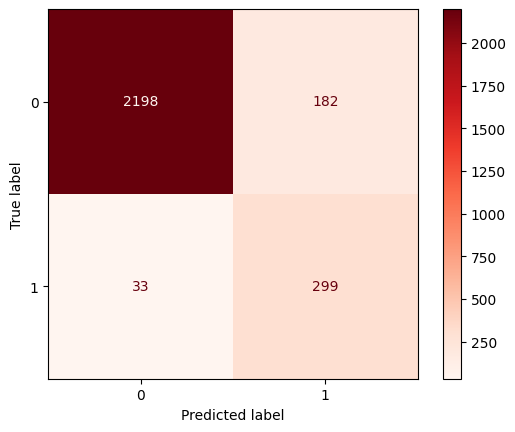

In [113]:
# Check Performance Model against Train-Set

y_pred_train_tune = grad_best_estimator.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_tune), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grad_best_estimator, x_train, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.4236111111111111 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1620
           1       0.32      0.65      0.42       189

    accuracy                           0.82      1809
   macro avg       0.63      0.74      0.66      1809
weighted avg       0.89      0.82      0.84      1809
 

Confusion Matrix      : 


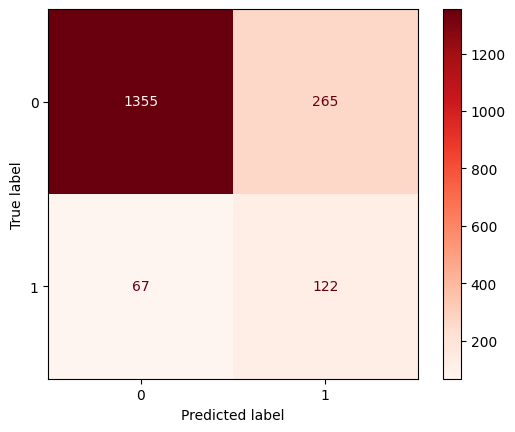

In [114]:
# Check Performance Model against Test-Set

y_pred_test_tune = grad_best_estimator.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_tune), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grad_best_estimator, x_test, y_test, cmap='Reds'))

In [115]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_tune, cv_scores_grad_tune, y_test, y_pred_test_tune, 'Gradient Boost (Tuning)')
pd.DataFrame(all_reports)

,Random Forest,SVM,KNN,Decision Tree,Ada Boost,Gradient Boost,Gradient Boost (Tuning)
train - precision,0.991018,0.355405,0.460641,0.299492,0.281922,0.373461,0.621622
train - recall,0.996988,0.792169,0.951807,0.888554,0.671687,0.822289,0.900602
train - accuracy,0.998525,0.798673,0.857670,0.731932,0.750369,0.809366,0.920723
train - f1_score,0.993994,0.490672,0.620825,0.447988,0.397150,0.513641,0.735547
cross val f1 score mean,0.397727,0.469195,0.413213,0.422236,0.439597,0.458592,0.427883
cross val f1 score std,0.048708,0.051974,0.051778,0.060984,0.049834,0.035146,0.053881
test - precision,0.313609,0.333333,0.280742,0.239804,0.261134,0.308036,0.315245
test - recall,0.560847,0.783069,0.640212,0.777778,0.682540,0.730159,0.645503
test - accuracy_score,0.825871,0.813709,0.791045,0.719182,0.765064,0.800442,0.816473
test - f1_score,0.402277,0.467615,0.390323,0.366584,0.377745,0.433281,0.423611


From the results it was found that tuning the gradient boosting produced the best params using learning_rate: 0.1, max_depth: 5, n_estimators: 200, random_state: 42, subsample: 0.75. There is a significant increase in the train f1 score (of 0.1), but there is a decrease of 0.01 in the test f1 score.

##### SVM (Tuning)

F1 Score - Train Set  :  0.4999999999999999 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      2380
           1       0.38      0.71      0.50       332

    accuracy                           0.83      2712
   macro avg       0.67      0.78      0.70      2712
weighted avg       0.88      0.83      0.85      2712
 

Confusion Matrix      : 


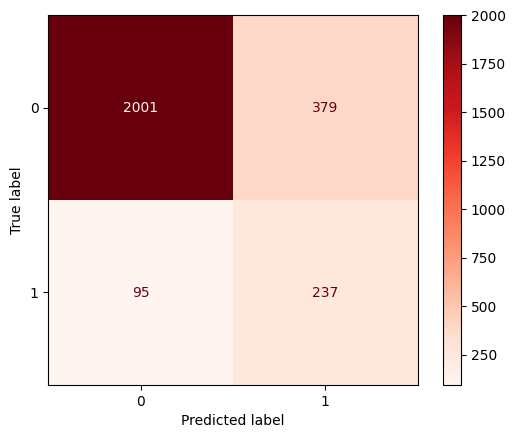

In [116]:
# Check Performance Model against Train-Set

y_pred_train_tune = svm_best_estimator.predict(x_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_tune), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_best_estimator, x_train, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.46100519930675904 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1620
           1       0.34      0.70      0.46       189

    accuracy                           0.83      1809
   macro avg       0.65      0.77      0.68      1809
weighted avg       0.90      0.83      0.85      1809
 

Confusion Matrix      : 


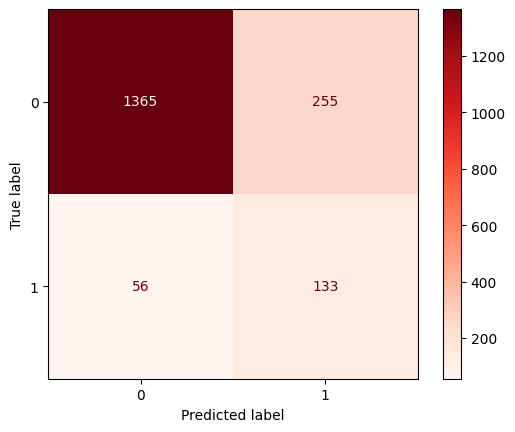

In [117]:
# Check Performance Model against Test-Set

y_pred_test_tune = svm_best_estimator.predict(x_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_tune), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_best_estimator, x_test, y_test, cmap='Reds'))

In [118]:
# Add the results to the dictionary
all_reports = performance_report(all_reports, y_train, y_pred_train_tune, cv_scores_svm_tune, y_test, y_pred_test_tune, 'SVM (Tuning)')
pd.DataFrame(all_reports)

,Random Forest,SVM,KNN,Decision Tree,Ada Boost,Gradient Boost,Gradient Boost (Tuning),SVM (Tuning)
train - precision,0.991018,0.355405,0.460641,0.299492,0.281922,0.373461,0.621622,0.384740
train - recall,0.996988,0.792169,0.951807,0.888554,0.671687,0.822289,0.900602,0.713855
train - accuracy,0.998525,0.798673,0.857670,0.731932,0.750369,0.809366,0.920723,0.825221
train - f1_score,0.993994,0.490672,0.620825,0.447988,0.397150,0.513641,0.735547,0.500000
cross val f1 score mean,0.397727,0.469195,0.413213,0.422236,0.439597,0.458592,0.427883,0.496570
cross val f1 score std,0.048708,0.051974,0.051778,0.060984,0.049834,0.035146,0.053881,0.028057
test - precision,0.313609,0.333333,0.280742,0.239804,0.261134,0.308036,0.315245,0.342784
test - recall,0.560847,0.783069,0.640212,0.777778,0.682540,0.730159,0.645503,0.703704
test - accuracy_score,0.825871,0.813709,0.791045,0.719182,0.765064,0.800442,0.816473,0.828082
test - f1_score,0.402277,0.467615,0.390323,0.366584,0.377745,0.433281,0.423611,0.461005


From the results, it was found that tuning the SVM produced the best params using kernel: rbf, gamma: 0.001, and C: 10. You can see an increase in the f1 score train, but the f1 score test experienced a decrease.

If a comparison is made between the tuning results and the baseline model, the following insights can be seen.
- There was an increase in the train f1 score, but a decrease in the test f1 score.
- The f1 score value of the train with cross val for Gradient Boost (tune) has quite a big difference. This indicates that the model is not good at predicting data that has not been seen before.

Therefore, we will use SVM (tuning) to be a prediction model.

##### Further Analysis
As we have chosen the SVM (tuning) model, we further analyse the confusion matrix to find out if there is a certain pattern to the false data.

##### Train Prediction

F1 Score - Train Set  :  0.4999999999999999 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      2380
           1       0.38      0.71      0.50       332

    accuracy                           0.83      2712
   macro avg       0.67      0.78      0.70      2712
weighted avg       0.88      0.83      0.85      2712
 

Confusion Matrix      : 


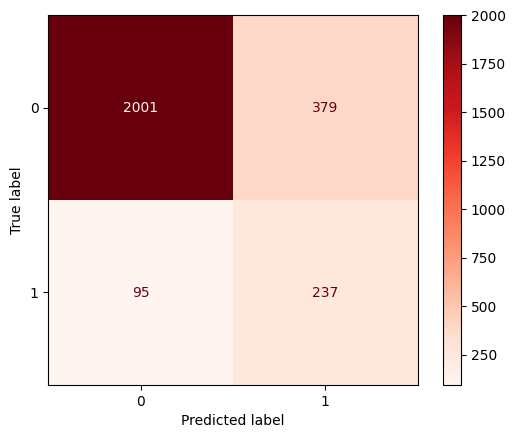

In [119]:
# Show the confusion matrix and report
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_tune), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_best_estimator, x_train, y_train, cmap='Reds'))

From the confusion matrix, we can see the breakdown as follows.
- True Positive : 238 people subscribed, and is predicted as subscribed.
- True Negative : 2000 people did not subscribe, and is predicted as not subscribed.
- False Positive : 380 people did not subscribed, but was predicted as subscribed user.
- False Negative : 94 people subscribed, but was predicted as not subsribed user.

From these numbers, we can see that there is a high number of False Positive (FP) users. If we want to minimize FP in our next tuning, we can focus on the Precision metrics.

We then check the data of users.

In [120]:
# Grab the data with prediction
analysis_train = df_train_init.copy()
analysis_train = analysis_train.drop('index', axis=1)
analysis_train['y_pred_train'] = y_pred_train_tune

# Show the data
analysis_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred_train
0,48,blue-collar,married,primary,no,574,no,no,cellular,5,aug,348,1,-1,0,unknown,no,0
1,32,blue-collar,married,secondary,no,14,yes,no,unknown,2,jun,171,1,-1,0,unknown,no,0
2,26,blue-collar,single,secondary,no,856,yes,yes,cellular,30,jul,95,5,-1,0,unknown,no,0
3,42,technician,single,secondary,no,0,no,no,cellular,21,aug,656,2,-1,0,unknown,no,1
4,57,admin.,divorced,unknown,no,887,no,no,unknown,20,jun,43,8,-1,0,unknown,no,0


###### False Positive

In [121]:
# Get the False Positive data
# False Positive data means having 0 (no) in initial data and 1 (yes) in predicted result
false_positive_train = analysis_train[(analysis_train['y']=='no') & (analysis_train['y_pred_train']==1)]
false_positive_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred_train
3,42,technician,single,secondary,no,0,no,no,cellular,21,aug,656,2,-1,0,unknown,no,1
17,59,housemaid,married,tertiary,no,0,no,yes,cellular,29,jul,376,2,-1,0,unknown,no,1
36,40,technician,married,secondary,no,697,no,no,cellular,24,jun,220,2,219,2,other,no,1
45,28,self-employed,single,tertiary,no,0,yes,no,cellular,21,jul,479,1,-1,0,unknown,no,1
63,29,services,single,secondary,no,209,yes,no,cellular,28,jul,487,7,-1,0,unknown,no,1


In [122]:
# Check the central distribution for FP data
false_positive_train.describe()

,age,balance,day,duration,campaign,pdays,previous,y_pred_train
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.0
mean,41.110818,1310.406332,15.551451,566.013193,2.480211,66.226913,1.047493,1.0
std,10.857585,2108.879816,7.735329,249.713989,2.335940,118.978484,2.318059,0.0
min,21.000000,-1400.000000,1.000000,74.000000,1.000000,-1.000000,0.000000,1.0
25%,33.000000,102.500000,9.000000,404.500000,1.000000,-1.000000,0.000000,1.0
50%,39.000000,534.000000,15.000000,529.000000,2.000000,-1.000000,0.000000,1.0
75%,47.000000,1611.500000,20.500000,667.500000,3.000000,104.500000,1.000000,1.0
max,83.000000,14533.000000,31.000000,1713.000000,20.000000,674.000000,18.000000,1.0


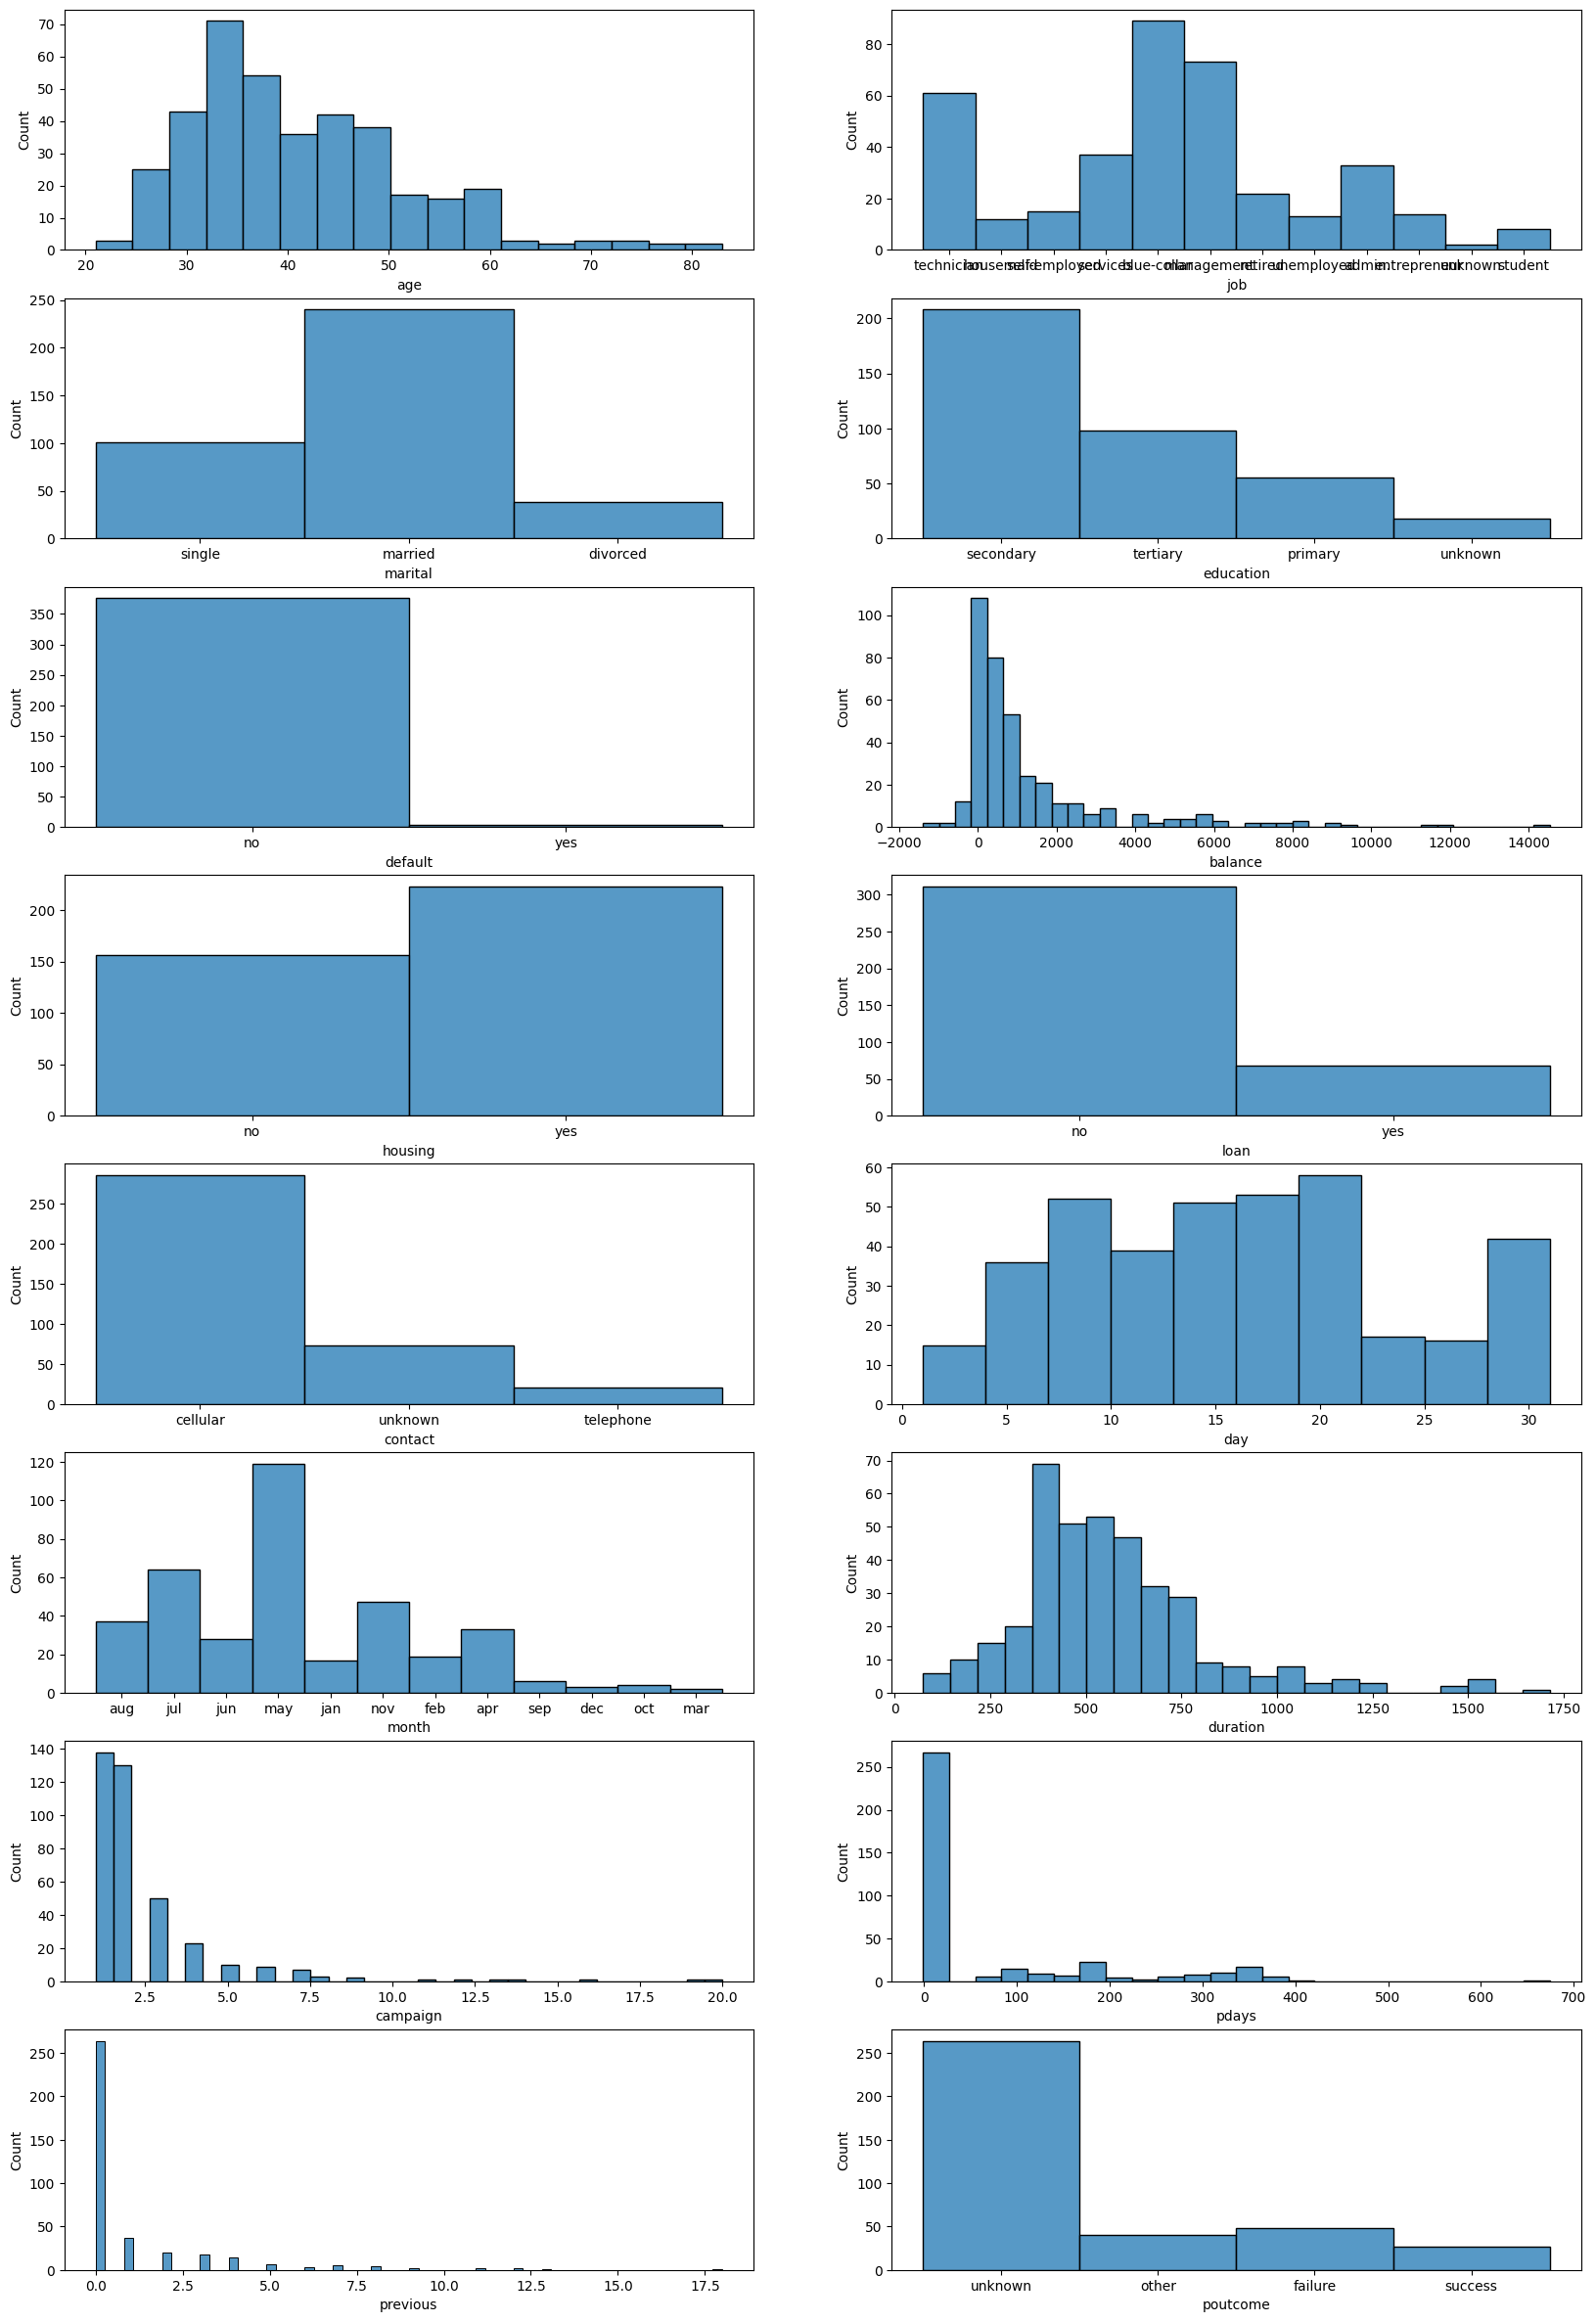

In [123]:
# See the distribution of data
fig = plt.figure(figsize=(20, 30))
cols = false_positive_train.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 8 # Defines the number of rows
num_cols = 2 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.histplot(data=false_positive_train, x=cols[index-1])
plt.show()

From the data we can see some similarity of distribution to the user features of those that actually subscribed. That is why the model predicted the data as 1. Hence, there might be an external feature that might affect the user choice.

###### False Negative

In [124]:
# Get the False negative data
# False negative data means having 1 (yes) in initial data and 0 (no) in predicted result
false_negative_train = analysis_train[(analysis_train['y']=='yes') & (analysis_train['y_pred_train']==0)]
false_negative_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred_train
25,48,management,married,tertiary,no,1167,yes,yes,cellular,1,jun,264,1,-1,0,unknown,yes,0
27,71,retired,married,tertiary,no,14220,yes,no,cellular,9,sep,397,1,-1,0,unknown,yes,0
28,40,management,single,tertiary,no,0,yes,no,cellular,23,feb,228,2,182,6,failure,yes,0
49,36,blue-collar,married,secondary,no,1049,yes,no,cellular,14,may,224,4,-1,0,unknown,yes,0
77,74,retired,divorced,secondary,no,4079,no,no,cellular,19,oct,343,3,-1,0,unknown,yes,0


In [125]:
# Check the central distribution for FN data
false_negative_train.describe()

,age,balance,day,duration,campaign,pdays,previous,y_pred_train
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0
mean,44.084211,1697.231579,15.842105,225.315789,1.884211,44.231579,0.473684,0.0
std,15.237596,2133.955465,8.556838,96.550203,1.367271,112.901525,1.137767,0.0
min,19.000000,-306.000000,1.000000,76.000000,1.000000,-1.000000,0.000000,0.0
25%,34.000000,197.000000,10.000000,156.000000,1.000000,-1.000000,0.000000,0.0
50%,41.000000,1013.000000,15.000000,223.000000,1.000000,-1.000000,0.000000,0.0
75%,53.000000,2492.500000,22.000000,283.500000,2.000000,-1.000000,0.000000,0.0
max,87.000000,14220.000000,30.000000,500.000000,9.000000,474.000000,6.000000,0.0


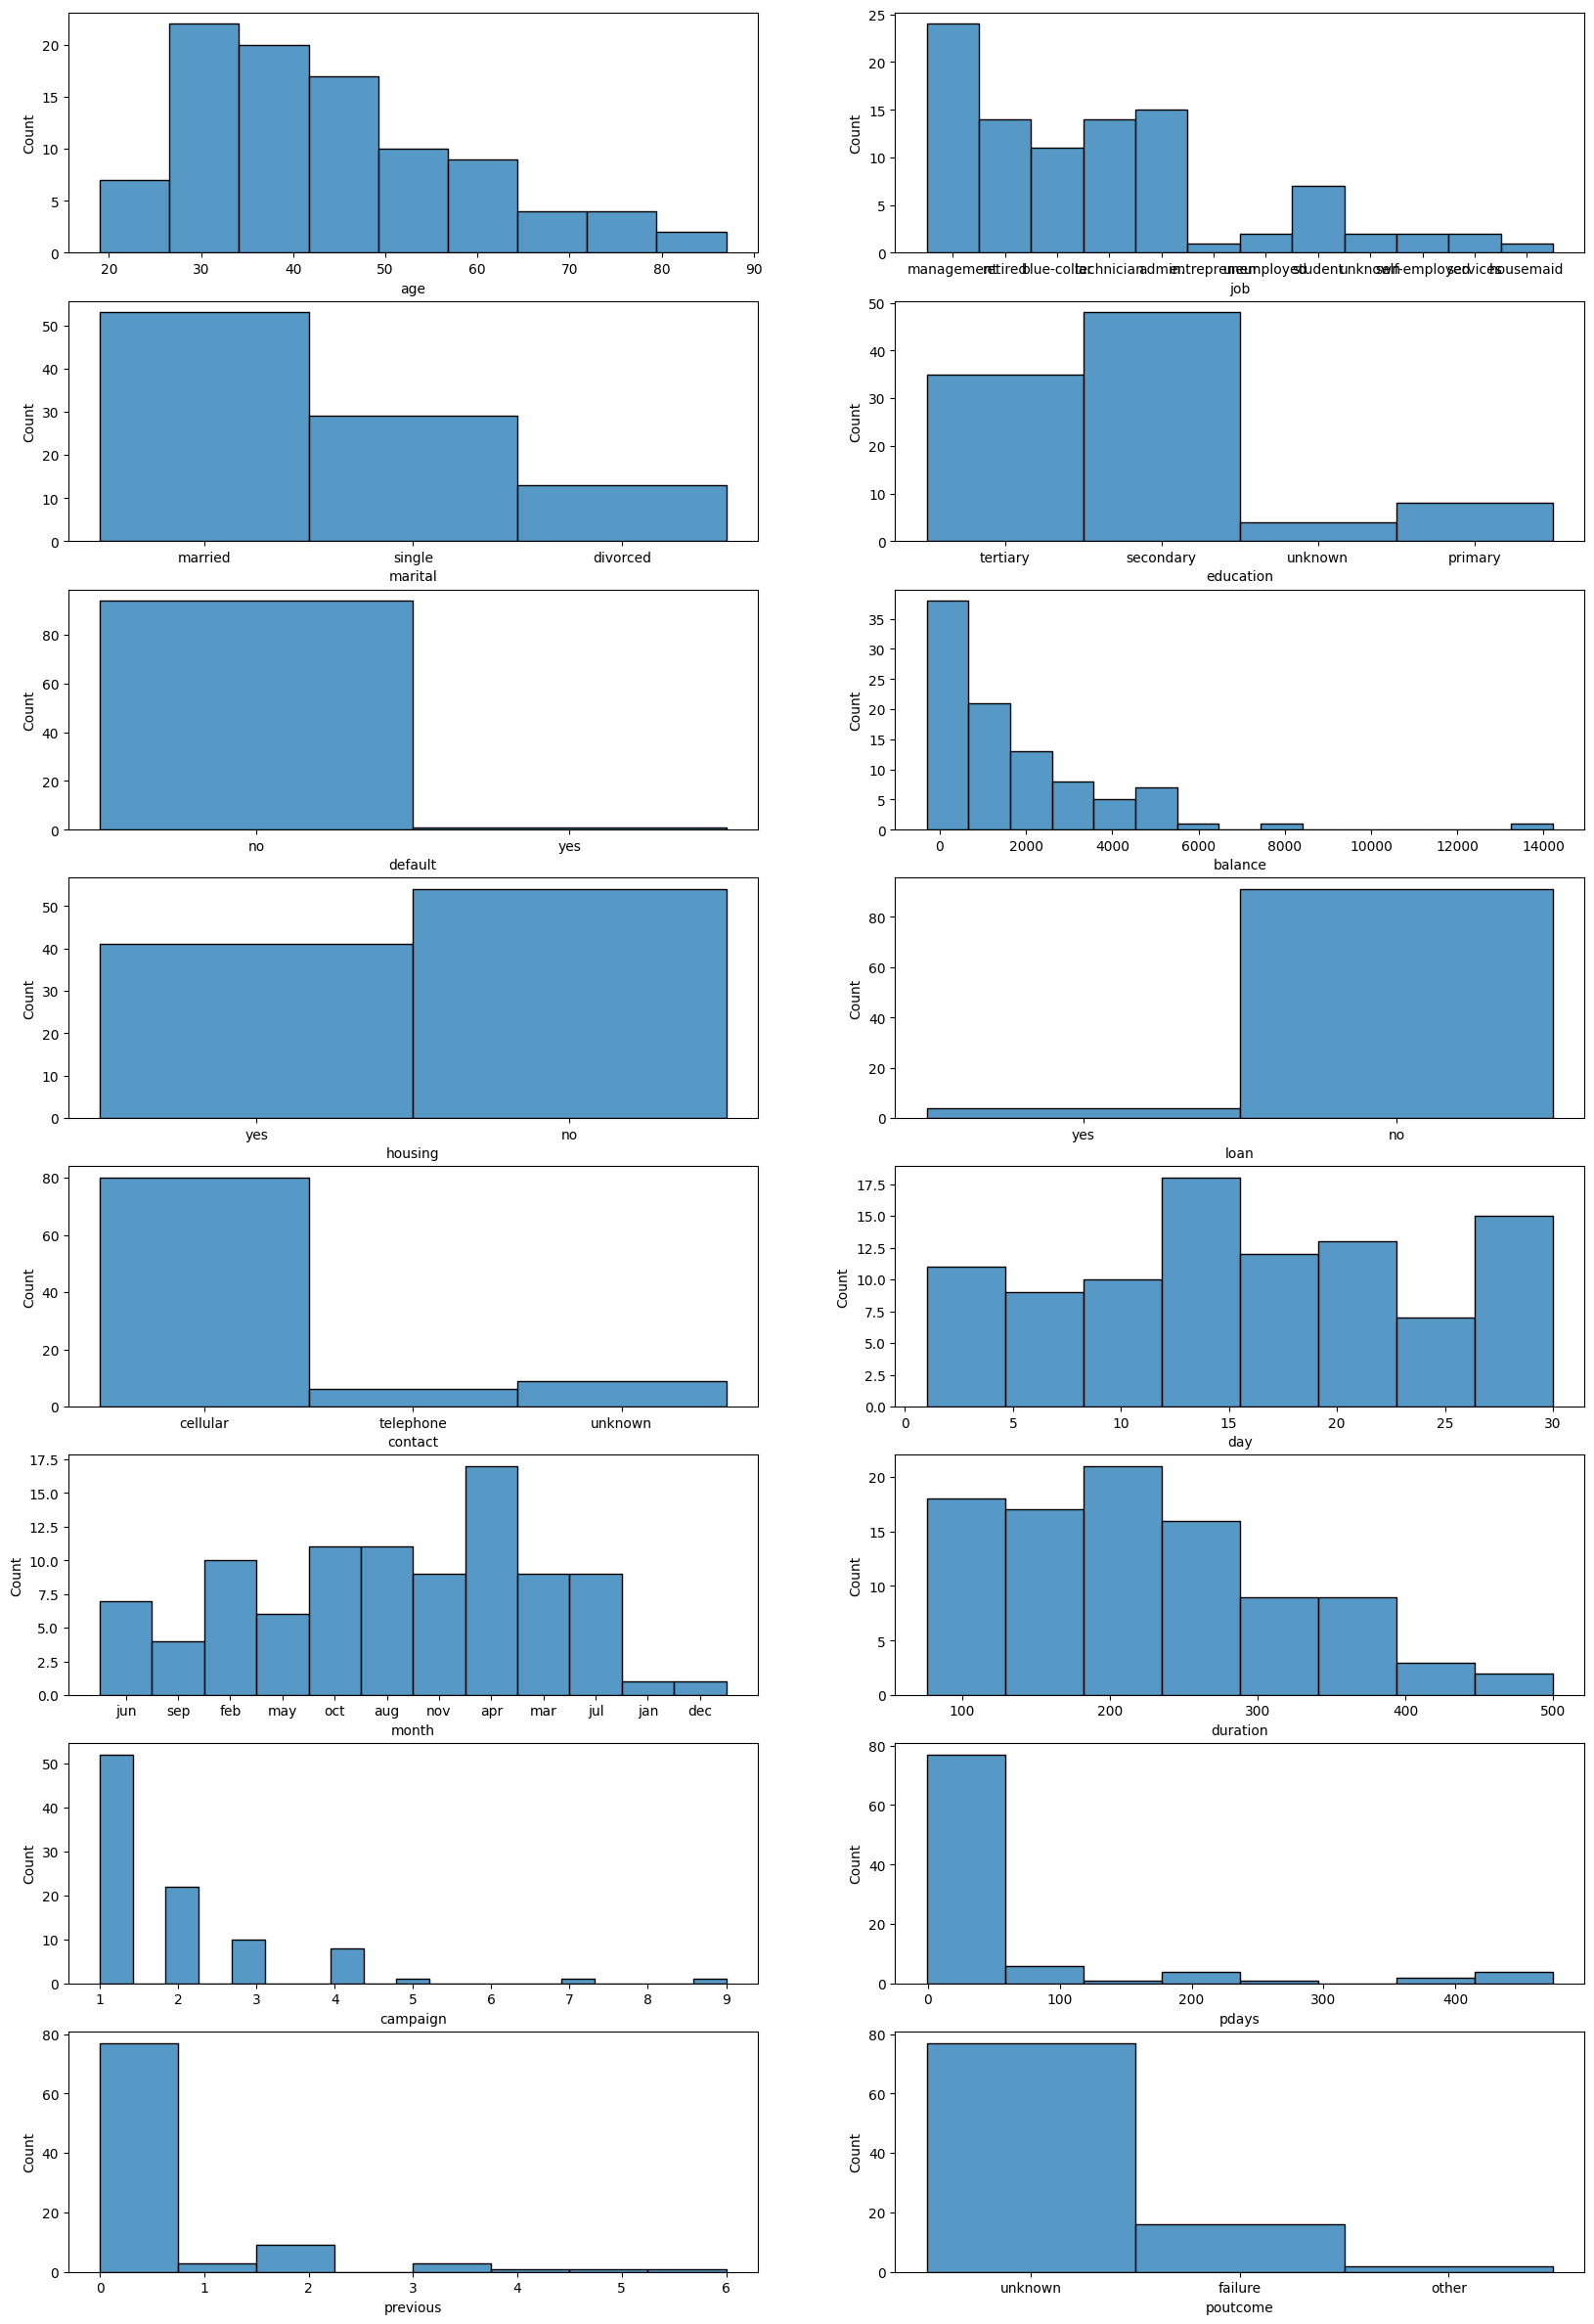

In [126]:
# See the distribution of data
fig = plt.figure(figsize=(20, 30))
cols = false_negative_train.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 8 # Defines the number of rows
num_cols = 2 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.histplot(data=false_negative_train, x=cols[index-1])
plt.show()

From the data we can see the highlight of the FN users is that they have low duration of calls at around 100-200 seconds and low balance. Thus, making the model think that the user is not interested.

##### Test Prediction

F1 Score - Test Set   :  0.46100519930675904 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1620
           1       0.34      0.70      0.46       189

    accuracy                           0.83      1809
   macro avg       0.65      0.77      0.68      1809
weighted avg       0.90      0.83      0.85      1809
 

Confusion Matrix      : 


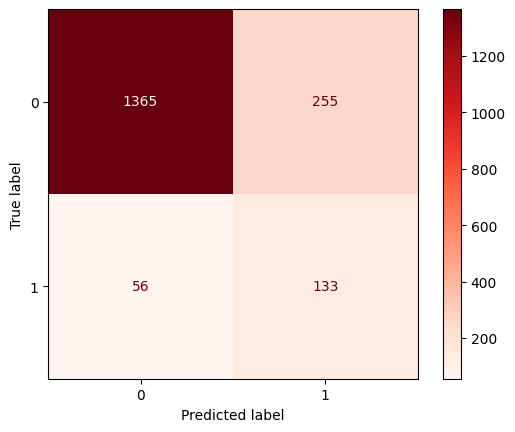

In [127]:
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_tune), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_tune), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_best_estimator, x_test, y_test, cmap='Reds'))

From the confusion matrix, we can see the breakdown as follows.
- True Positive : 134 people subscribed, and is predicted as subscribed.
- True Negative : 1363 people did not subscribe, and is predicted as not subscribed.
- False Positive : 257 people did not subscribed, but was predicted as subscribed user.
- False Negative : 55 people subscribed, but was predicted as not subsribed user.

From these numbers, we can also see that there is a high number of False Positive (FP) users. If we want to minimize FP in our next tuning, we can focus on the Precision metrics.

We then check the data of users.

In [128]:
# Grab the data with prediction
analysis_test = df_test_init.copy()
analysis_test = analysis_test.drop('index', axis=1)
analysis_test['y_pred_test'] = y_pred_test_tune

# Show the data
analysis_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred_test
0,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,no,0
1,50,management,married,tertiary,no,2881,no,no,cellular,5,aug,510,2,2,5,other,no,1
2,50,technician,married,secondary,no,1412,no,no,cellular,6,aug,131,3,-1,0,unknown,no,0
3,37,management,married,tertiary,no,0,yes,no,unknown,3,jun,247,13,-1,0,unknown,no,0
4,31,admin.,single,secondary,no,757,no,no,cellular,3,feb,343,2,-1,0,unknown,no,0


###### False Positive

In [129]:
# Get the False Positive data
# False Positive data means having 0 (no) in initial data and 1 (yes) in predicted result
false_positive_test = analysis_test[(analysis_test['y']=='no') & (analysis_test['y_pred_test']==1)]
false_positive_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred_test
1,50,management,married,tertiary,no,2881,no,no,cellular,5,aug,510,2,2,5,other,no,1
7,31,admin.,divorced,secondary,no,360,no,no,cellular,15,may,332,1,297,2,other,no,1
13,71,retired,divorced,tertiary,no,261,no,no,cellular,12,aug,1117,2,-1,0,unknown,no,1
43,31,blue-collar,divorced,secondary,no,6,yes,no,cellular,29,jan,821,1,-1,0,unknown,no,1
44,39,management,single,secondary,no,835,yes,no,unknown,29,may,587,4,-1,0,unknown,no,1


In [130]:
# Check the central distribution for FP data
false_positive_test.describe()

,age,balance,day,duration,campaign,pdays,previous,y_pred_test
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.0
mean,40.572549,1460.996078,14.592157,587.537255,2.509804,66.737255,0.898039,1.0
std,10.761262,2578.203799,7.761094,336.840481,2.720385,117.633345,1.860646,0.0
min,19.000000,-1202.000000,2.000000,60.000000,1.000000,-1.000000,0.000000,1.0
25%,32.000000,50.000000,7.500000,407.500000,1.000000,-1.000000,0.000000,1.0
50%,38.000000,507.000000,15.000000,526.000000,2.000000,-1.000000,0.000000,1.0
75%,48.000000,1424.000000,20.000000,679.000000,3.000000,104.000000,1.000000,1.0
max,77.000000,15459.000000,31.000000,3025.000000,28.000000,462.000000,10.000000,1.0


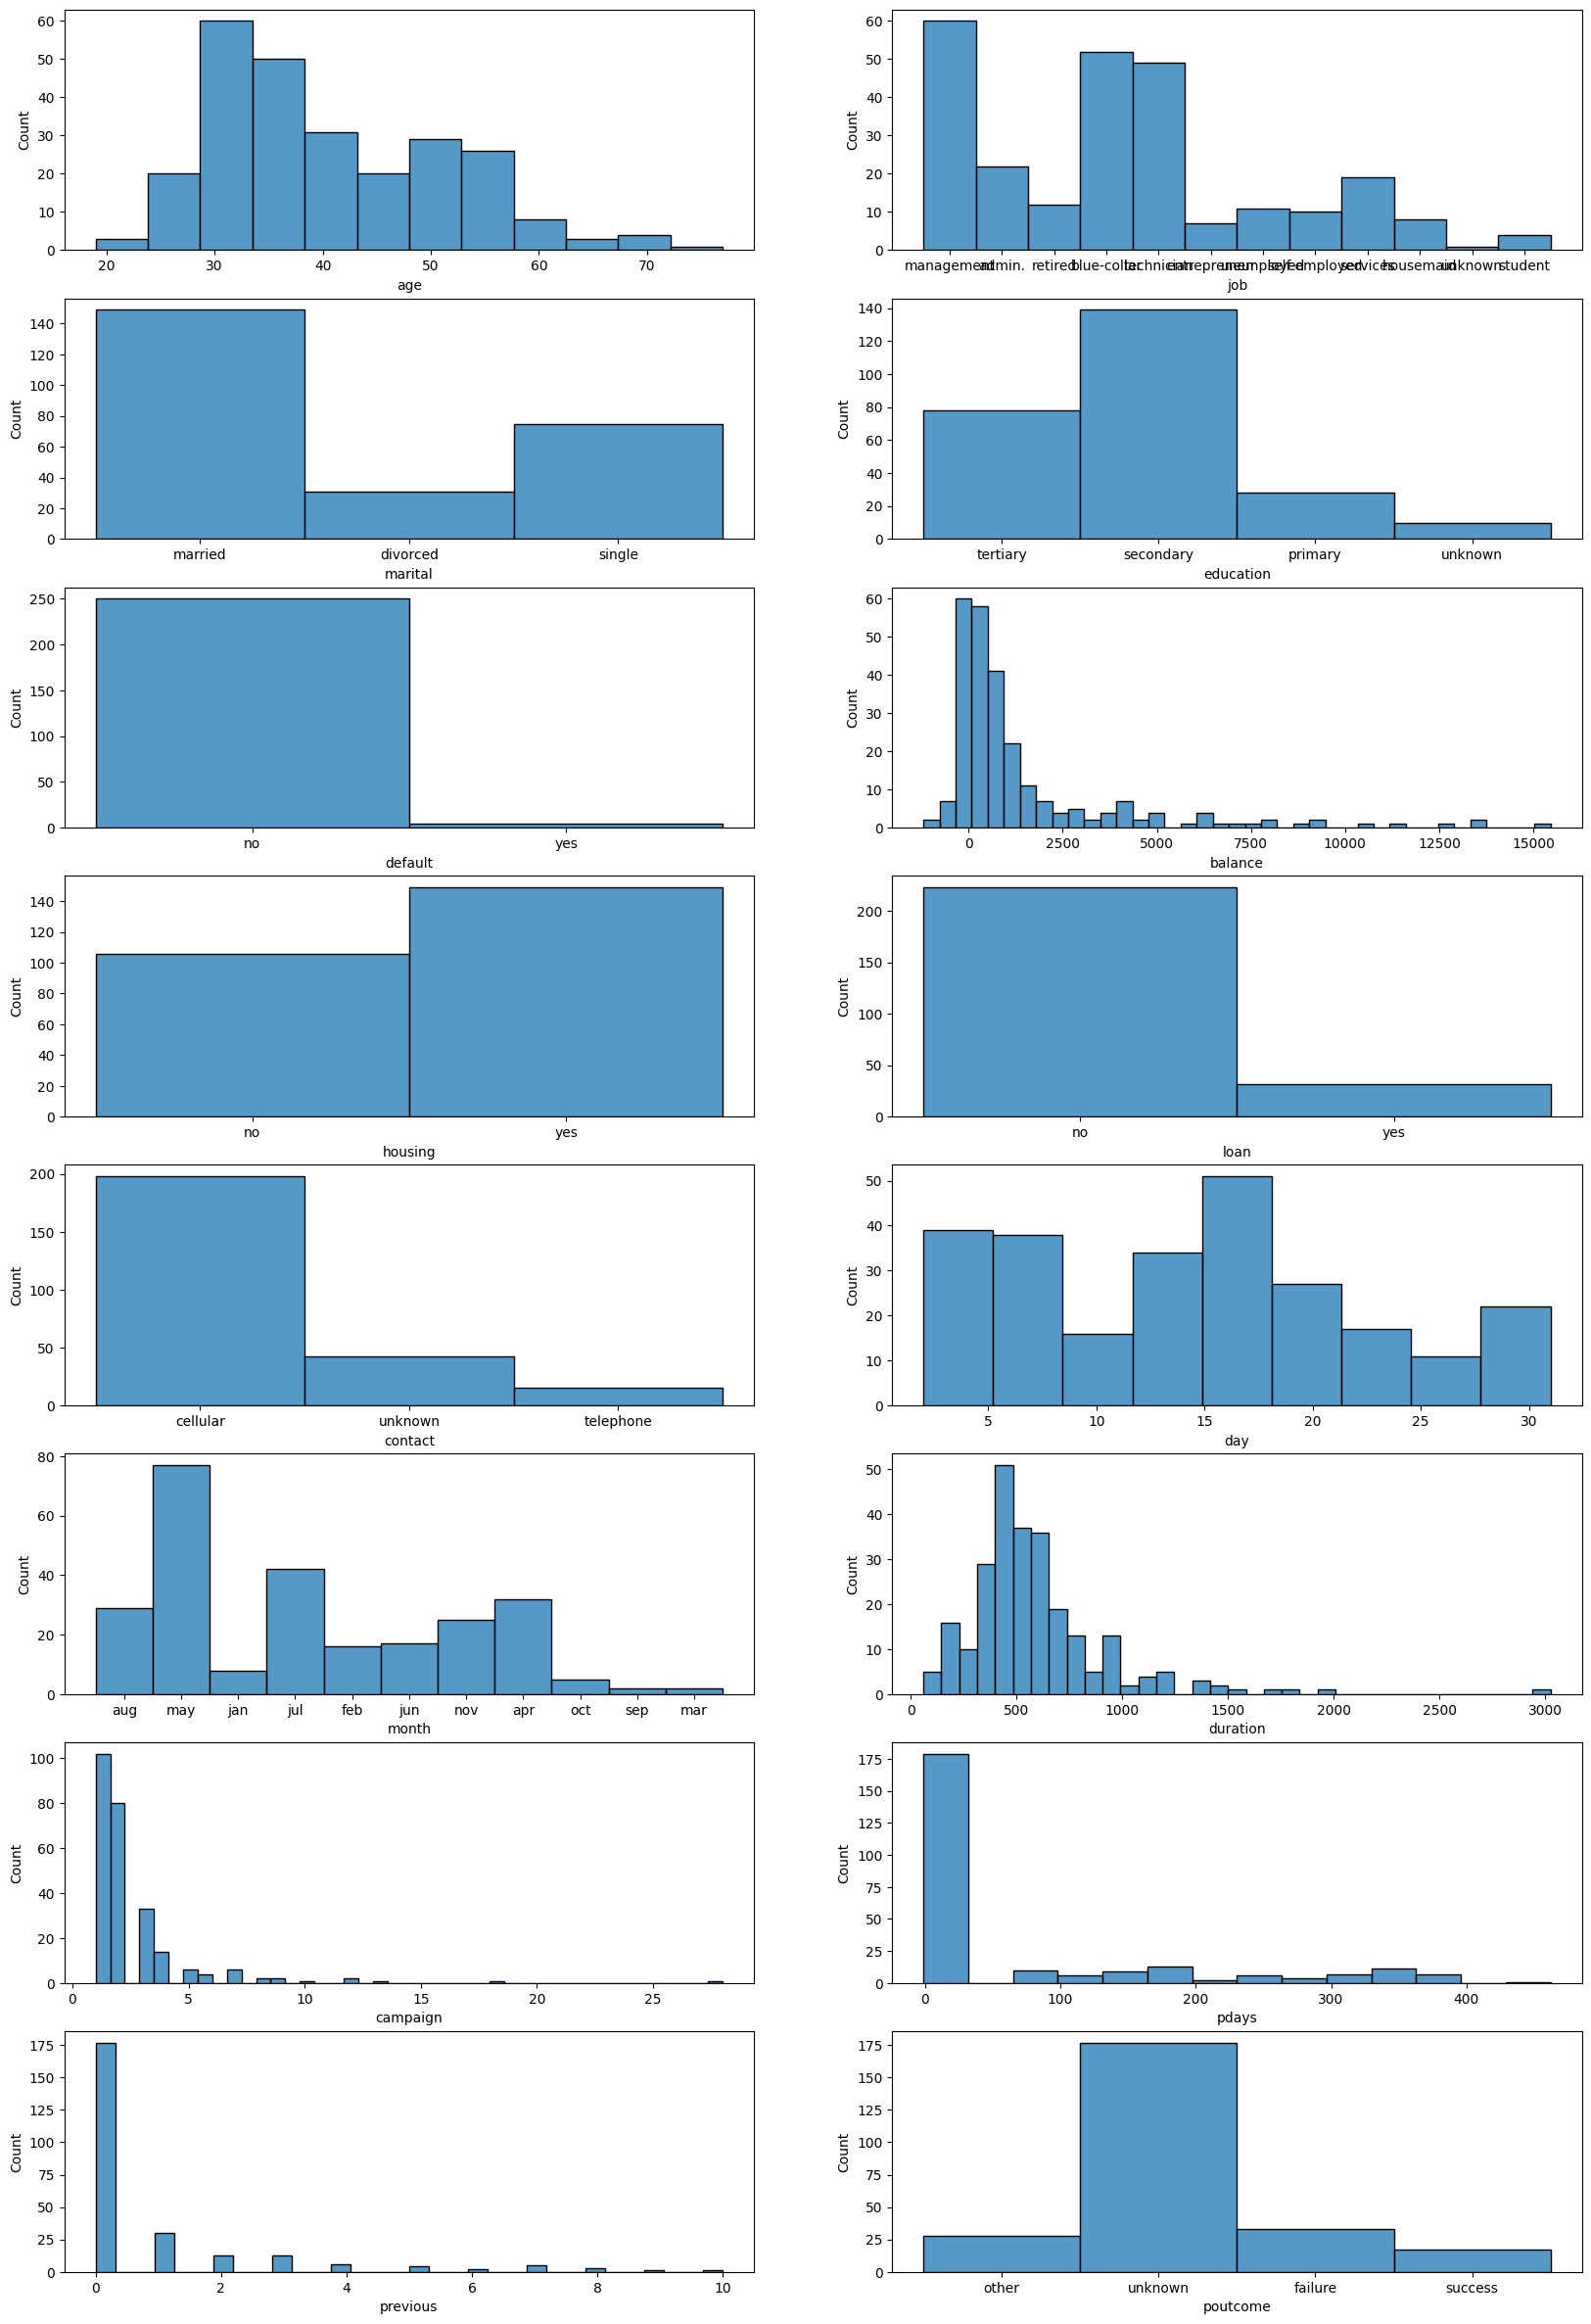

In [131]:
# See the distribution of data
fig = plt.figure(figsize=(20, 30))
cols = false_positive_test.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 8 # Defines the number of rows
num_cols = 2 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.histplot(data=false_positive_test, x=cols[index-1])
plt.show()

We can see a similar distribution to the train set. Thus being the reason of the outcome.

###### False Negative

In [132]:
# Get the False negative data
# False negative data means having 1 (yes) in initial data and 0 (no) in predicted result
false_negative_test = analysis_test[(analysis_test['y']=='yes') & (analysis_test['y_pred_test']==0)]
false_negative_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred_test
53,42,technician,married,secondary,no,994,yes,no,cellular,11,aug,149,1,78,5,failure,yes,0
68,40,blue-collar,married,secondary,no,1451,no,no,cellular,1,jun,314,1,-1,0,unknown,yes,0
91,49,technician,married,tertiary,no,523,yes,no,cellular,3,mar,152,2,-1,0,unknown,yes,0
135,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes,0
171,33,services,divorced,secondary,no,2411,yes,no,cellular,23,oct,130,1,161,1,failure,yes,0


In [133]:
# Check the central distribution for FN data
false_negative_test.describe()

,age,balance,day,duration,campaign,pdays,previous,y_pred_test
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,41.321429,2857.839286,15.500000,256.107143,1.892857,58.678571,0.446429,0.0
std,13.170362,4957.717696,9.336147,109.926699,1.330462,143.307439,0.970841,0.0
min,23.000000,-90.000000,1.000000,30.000000,1.000000,-1.000000,0.000000,0.0
25%,31.000000,230.000000,7.000000,201.250000,1.000000,-1.000000,0.000000,0.0
50%,38.000000,1019.000000,14.500000,249.000000,1.000000,-1.000000,0.000000,0.0
75%,52.250000,3301.500000,25.000000,318.500000,2.000000,74.250000,1.000000,0.0
max,84.000000,26965.000000,31.000000,654.000000,8.000000,804.000000,5.000000,0.0


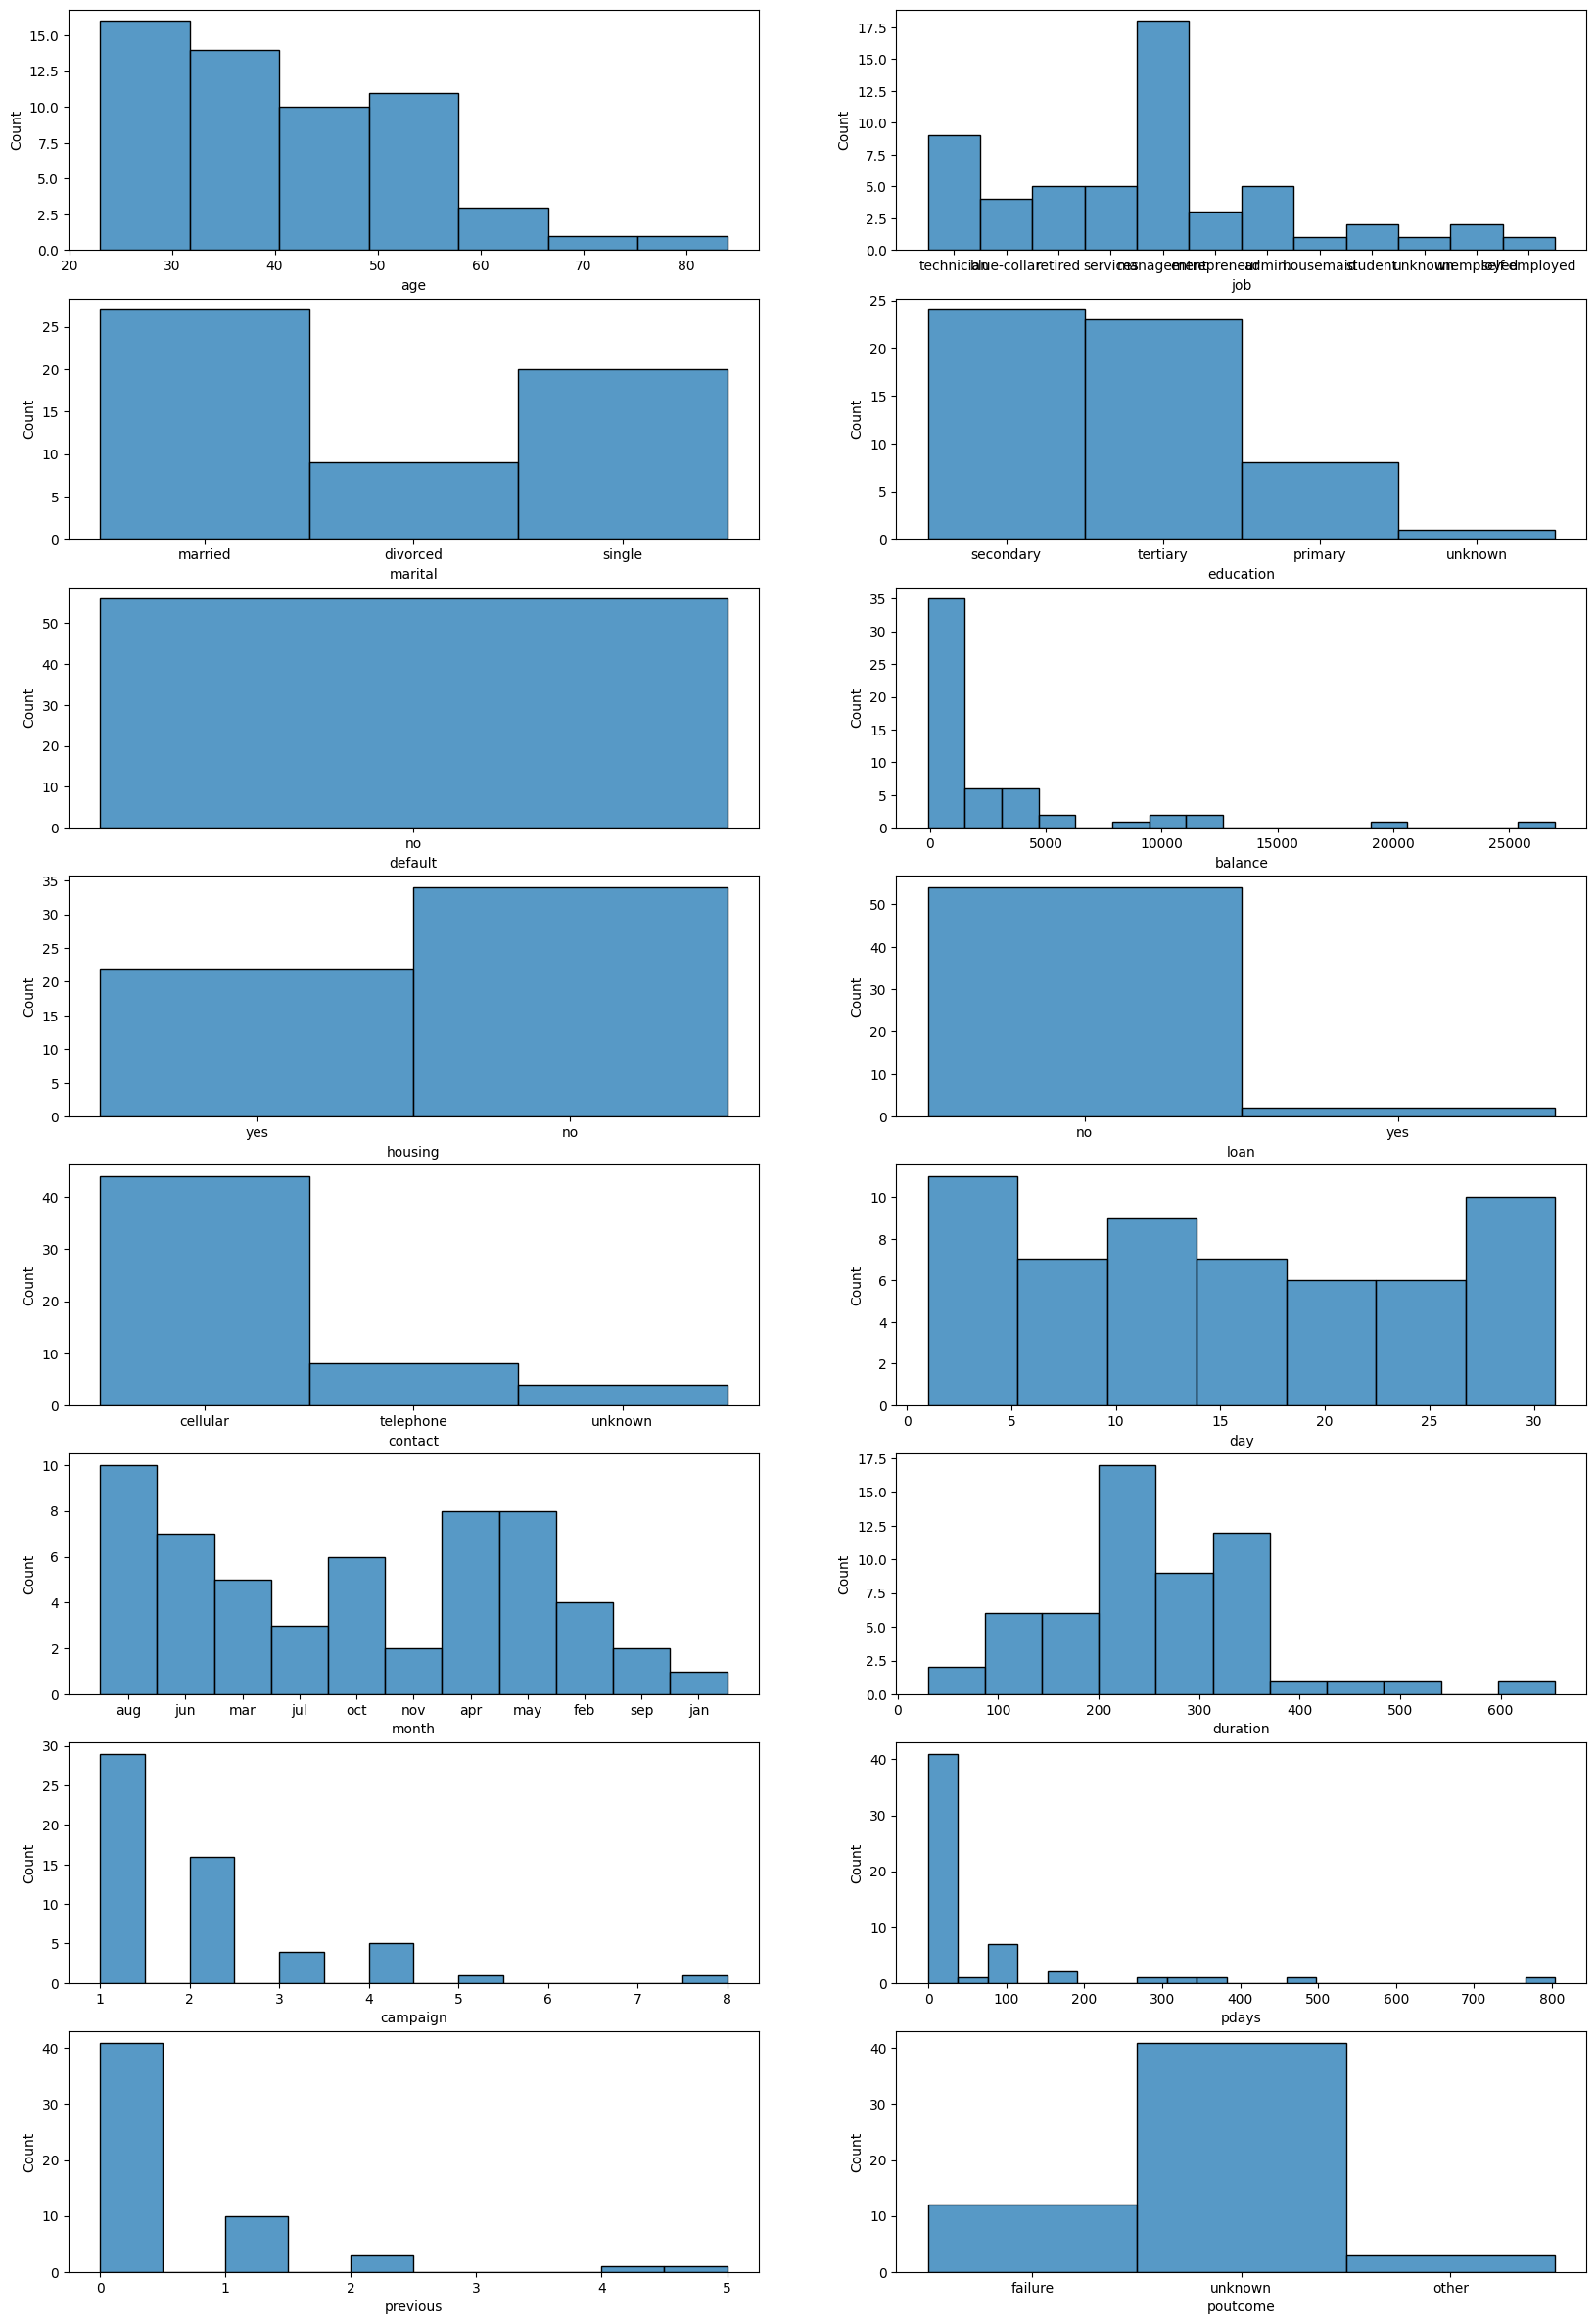

In [134]:
# See the distribution of data
fig = plt.figure(figsize=(20, 30))
cols = false_negative_test.columns.tolist() # Retrieves the name of the column to be visualized
num_rows = 8 # Defines the number of rows
num_cols = 2 # Defines the number of columns

# Perform plotting iterations for each feature
for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.histplot(data=false_negative_test, x=cols[index-1])
plt.show()

We can also see a resemblance for the test set distribution where the FN users have low duration of calls at around 100-200 seconds and low balance. Thus, making the model think that the user is not interested.

## Model Saving
In this section, the process of saving the model and other files related to the results of the model creation process is carried out.

In [135]:
# Save the SVM tuned model (which also include the pipeline) as a pickle file
model_pkl_file = "bank_market_svm.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(svm_best_estimator, file)

# Save outlier handling as a pickle file
model_pkl_file2 = "bank_market_outlier_handle.pkl"

with open(model_pkl_file2, 'wb') as file:
    pickle.dump(winsorizer, file)

In [136]:
# Exporting the related functions
%%writefile bank_market_func.py
# Import related library
import numpy as np

# Function for Binary encoding
def binary_mapping(df, var):
    df[var+'_enc'] = df[var].map({'yes': 1, 'no': 0})
    return df

# Function for null imputation
def null_imputer(df, variable, null_value):
    df[variable+'_NA'] = np.where(df[variable] == null_value, 1, 0)
    return df

Writing bank_market_func.py


## Model Inference
The model that has been trained will be tested on data that is not included in the train-set or test-set.

In [137]:
# Create new data
new_data = {
    'age': 22,
    'job': 'unemployed',
    'marital': 'single',
    'education': 'primary',
    'default': 'no',
    'balance': 10000,
    'housing': 'no',
    'loan': 'no',
    'contact': 'cellular',
    'day': 14,
    'month': 'oct',
    'duration': 30,
    'campaign': 1,
    'pdays': 20,
    'previous': 1,
    'poutcome': 'failure'
}
new_data = pd.DataFrame([new_data])
new_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,22,unemployed,single,primary,no,10000,no,no,cellular,14,oct,30,1,20,1,failure


In [138]:
# Adjustment of the features to be used
inf_data = new_data[['duration','previous','balance','poutcome','contact','housing','loan']]

In [139]:
# Perform imputation by adding the var+_NA column
# Defining column to be imputed
impute_column = ['poutcome']
# Iterating through the value for imputation
for var in impute_column:
    null_imputer(inf_data, var, 'unknown')

<ipython-input-35-606f7292cb11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_NA'] = np.where(df[variable] == null_value, 1, 0)


In [140]:
# Binary encoding
# Define binary data
bin_columns = ['housing', 'loan']

# Generate binary data using map
for var in bin_columns:
    binary_mapping(inf_data, var)

# Dropping initial data
inf_data_enc = inf_data.drop(columns=bin_columns)

<ipython-input-48-2398124695b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_enc'] = df[var].map({'yes': 1, 'no': 0})
<ipython-input-48-2398124695b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_enc'] = df[var].map({'yes': 1, 'no': 0})


In [141]:
# Make predictions with models
print('Prediction : ', svm_best_estimator.predict(inf_data_enc))

Prediction :  [0]


From the results it can be seen that for someone's available data, it is predicted that **will not subscribe to the Term Deposit**.

## Conclusion

With the aim of creating a classification model to predict user subscriptions for term deposit, the following insights were obtained.
1. Data that is influential and has correlation includes duration, previous, balance, output, contact, housing, and loan.
2. To make predictions, use the Random Forest, SVM, KNN, Decision Tree, and Boosting classification models using Ada Boost and Gradient Boost because the data you want to make classification predictions about
3. The f1 score is used to carry out evaluations because the f1 score balances recall and prediction performance.
4. From the baseline model, the following results are obtained.

| Metrics | Random Forest | SVM | KNN | Decision Tree | Ada Boost | Gradient Boost |
| --- | --- | --- | --- | --- | --- | --- |
| train - f1 score | 0.993976	| 0.487273 | 0.612164 |	0.477922 |	0.421308 |	0.529471 |
| cross val f1 score mean | 0.385535 |	0.474722 |	0.402831 |	0.444867 |	0.393308 |	0.460552 |
| test - f1 score | 0.405303 |	0.464832 |	0.380165 |	0.381992 |	0.413655 |	0.448445 |

 - Overfitting occurs in Random Forest
 - Other models experience a tendency towards underfit results (low train and test values)
 - This indicates that the duration, previous, balance, output, contact, housing, and loan features are not good at predicting user subscriptions for term deposits.
 - The best model (with differences that are not extreme in train-test) is SVM. We continue using hyperparameter tuning on the SVM.

5. After hyperparameter tuning of the SVM, there was an increase in the train f1 score and a relatively slight decrease in the test f1 score.
6. The users who is favorable to term deposit subscribtion are married people at around 30-40 years old. They also don't have loans.
7. The highest subscription uptake is on May, however we can see a steady high value at April to August.

Recommendation for telemarketer : Target the married with no loan users. Make the best of the time (at around 9 minutes of call) to market the term deposit.

**Next Steps**

To carry out further modeling, you can readjust the feature retrieval by trying to reduce the number of categorical feature retrievals or not use features that have many unknown values ​​altogether (outcome).



## Conceptual Problems

### 1. Explain the background of bagging and how bagging works!

**Background**

The baseline reason of bagging is that high variance models tend to overfit to the training data, meaning they perform well on training data but poorly on unseen data (test data). So bagging uses a method called _bootstrap sampling_ where multiple subsets of the training data are created by randomly sampling with replacement. Which will then be combined and averaging the outcome. This will help with improving the stability and accuracy of machine learning models.

**How it works?**

![picture](https://media.geeksforgeeks.org/wp-content/uploads/20230731175958/Bagging-classifier.png)

Bagging works by combining the prediction of multiple base model trained on different subsets. The flow is as follows.
1. Bootstrap Sampling : Creating multiple bootstrap samples from the original training data. The data for the samples is chosen randomly.
2. Model Training : A base model is then trained independently on each bootstrap sample.
3. Prediction : After training all base models, predictions are made for new data points using each individual model.
4. Combining the result : The result from each individual subset is then combined.
  - Classification : Using major voting
  - Regression : Using averaging

Then the result of the ensemble is finished. As the final prediction is obtained by aggregating the predictions from all base models. This ensemble of models tends to provide more stable and accurate predictions than any individual model. The aggregation step helps to reduce variance and overfitting, leading to better generalization performance.

### 2. Explain the difference in how the Random Forest algorithm works and the boosting algorithm you chose!

**Similarity**

1. Base Learner. All models uses a type of decision tree model for their base learner or weak learner.
2. All can be used for ensemble learning.

**Difference**

To help with understanding the difference, I will help to summarize in a table then give an in depth understanding for the flows. The difference table is as follows.

| Difference | Random Forest | Ada Boost | Gradient Boost |
| --- | --- | --- | --- |
| Ensemble type | Bagging | Boosting | Boosting |
| The flow of work | Paralel | Sequential | Sequential |
| The data | Partitioned randomly selected data | Using initial data | Using initial data |
| Aggregation | Average/ Major voting | Weighted sum | Prediction combined directly |

So, as we know random forest is one of models that is typically used for bagging ensemble (as explained in previous question). Whereas Ada Boost and Gradient Boost is both boosting ensemble. How does boosting work?

![picture](https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png)

Boosting focuses on error correction from previous model. So the flow of boosting:
1. Initialization : Creating the base learner (or we call it weak learner)
2. Iterative training : For each prediction, Boosting will assign a higher weight to misclassified instances. Then a new weak learner is assigned to predict once again. All over again until the number of iterations is met.
3. Combining Prediction : After all iterations are complete, the final prediction is made by aggregating the predictions of all weak learners in the ensemble.
  - Classification : weighted voting
  - Regression : averaging
  
  Using weighted ensemble, so stronger learners, may have a greater influence on the final prediction.

### 3. Explain what is meant by Cross Validation!

As we know, in modeling we have a problem of Data Leakage (the potential of seeing the test data before the final modeling). This can lead to overfitting. Thus, we try to split the train data for experiment purposes before actually testing on the test data. This is what we call cross-validation.

Cross-validation is a resampling technique used in machine learning to evaluate the performance of a model on unseen data. It helps assess how well the model generalizes to new data by simulating the process of training and testing on multiple subsets of the available data.

So how does cross-validation works?

![picture](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

1. Data Splitting: The dataset is divided into two or more subsets: typically a training set and a testing set. In the case of k-fold cross-validation, the data is partitioned into k equal-sized folds.

2. Training and Validation: The model is trained on a subset of the data, known as the training set. Then, the performance of the model is evaluated on another subset of the data, known as the validation set or test set.

3. Iteration: The process is repeated multiple times, with each iteration using a different partition of the data for training and validation. In k-fold cross-validation, this involves splitting the data into k folds and iterating k times, with each fold used once as the validation set while the remaining folds are used for training.

4. Performance Aggregation: The performance metrics (such as accuracy, precision, recall, etc.) obtained from each iteration are averaged to obtain a single performance estimate for the model.

Cross-validation is beneficial for better utilization of data (as we train and test on different subset data) and reduced variance (by averaging the performance over multiple iterations).

Common types of cross-validation include k-fold cross-validation, stratified k-fold cross-validation, leave-one-out cross-validation, and repeated k-fold cross-validation.